<div>
    <a href="../notebook/1. Business & Data Understanding.ipynb" style="float: left; padding: 10px; background-color: #007bff; color: white;">Previous</a>
    <a href="../notebook/3. Data Modeling.ipynb" style="float: right; padding: 10px; background-color: #007bff; color: white"> Next </a>
</div>

## Section 2 | Initial Data Analysis

---

Fase [data analisis awal](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) akan berfokus untuk melakukan pengecekan terhadap: 
* **Karakteristik sampel data**: deskripsi dari struktur sampel data, dengan melihat statistik dasar dari important variables
* **Kualitas data**: menggunakan beragam tipe analisis, seperti frequency counts, descriptive statistics (mean, standard deviation, dan median), dan normality (skewness, kurtosis, dan frequentist test)
* **Extreme observations**: outlying observations in the data are analyzed to see if they seem to disturb the distribution.

Untuk memenuhi asumsi yang diperlukan dari model fitting dan uji hipotesis, serta melakukan transformasi terhadap data sejauh yang diperlukan.

### Data ETL

[Extract, transform, load](https://en.wikipedia.org/wiki/Extract,_transform,_load) (ETL) is a three-phase computing process where data is:
1. *Extracted from an input source*: in this project, the data is directly extracted from the source using library implemented by the data provider,
2. *Transformed to an appropriate format*: karena dataset telah tersedia dalam format DataFrame, maka tahapan ini cukup menggabungkan variabel dataset yang terpisahkan antara feature dengan target, and
3. Loaded into an output data container: berupa variable instance dalam bahasa pemrograman Python.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
iranian_churn = fetch_ucirepo(id=563) 
  
features = iranian_churn.data.features 
target = iranian_churn.data.targets 

dataset = pd.concat(
    objs=[features, target],
    axis=1
)

dataset.head(n=5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


* Data succesfully extracted from the input source, transformed to the appropriate format, and loaded into the variable instance
* Dan ditampilkan 5 baris data pertama dari dataset sebagai contoh hasil dari tahapan ETL
* Setiap baris dalam dataframe merepresentasikan satu *instance* dari pelanggan Telecom
* Sedangkan kolom adalah variabel atau *feature* yang mewakili keragaman dari tiap pelanggan
* Khusus untuk kolom terakhir merupakan *target variable*, which is the variable that corresponds to the input data (features). Variabel ini lebih berperan dalam statistical analysis ataupun machine learning tasks, yang akan dilakukan pada bagian-bagian berikutnya dalam project ini.

### Data Audit

The data is audited or inspected with the use of statistical and database methods to detect anomalies and contradictions
* This eventually indicates the characteristics of the anomalies and their locations.
* Karena proses ini akan dilakukan berulang kali (...), maka dibuat sebuah fungsi yang menampilkan deskripsi sekaligus mendeteksi anomali dalam dataset

In [2]:
def audit_data(data):
    audit_description = {
        "Row/Instance": data.shape[0],
        "Column/Variable": data.shape[1],
        "Integer Variable": len(data.select_dtypes(include="int64").columns),
        "Continuous Variable": len(data.select_dtypes(include="float64").columns),
        "Boolean Variable": len(data.select_dtypes(include="bool").columns),
        "Categorical Variable": len(data.select_dtypes(include="object").columns)
        }
    
    audit_result = {
        "Dtype": data.dtypes,
        "Duplicated": data.duplicated().sum(),
        "Missing": data.isna().sum(),
        "Unique": data.nunique(),
        "Sample": [data[column].unique() for column in data.columns]
        }
    
    return pd.DataFrame(data=audit_description, index=["Value"]).T,\
        pd.DataFrame(data=audit_result).rename_axis(index="Variable")

In [3]:
df = dataset.copy()

*Copying into new dataframe*:
1. *To avoid reflecting modifications to the original dataset, and*
2. *To avoid [chained indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-view-versus-copy).*

In [4]:
df_description, df_result = audit_data(data=df)

print("Data Description:")
display(df_description)
print("Data Audit:")
display(df_result)

Data Description:


,Value
Row/Instance,3150
Column/Variable,14
Integer Variable,13
Continuous Variable,1
Boolean Variable,0
Categorical Variable,0


Data Audit:


,Dtype,Duplicated,Missing,Unique,Sample
Variable,,,,,
Call Failure,int64,300,0,37,"[8, 0, 10, 3, 11, 4, 13, 7, 6, 9, 25, 2, 23, 2..."
Complains,int64,300,0,2,"[0, 1]"
Subscription Length,int64,300,0,45,"[38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 1..."
Charge Amount,int64,300,0,11,"[0, 1, 2, 3, 8, 4, 9, 7, 5, 10, 6]"
Seconds of Use,int64,300,0,1756,"[4370, 318, 2453, 4198, 2393, 3775, 2360, 9115..."
Frequency of use,int64,300,0,242,"[71, 5, 60, 66, 58, 82, 39, 121, 169, 83, 95, ..."
Frequency of SMS,int64,300,0,405,"[5, 7, 359, 1, 2, 32, 285, 144, 0, 8, 54, 483,..."
Distinct Called Numbers,int64,300,0,92,"[17, 4, 24, 35, 33, 28, 18, 43, 44, 25, 12, 32..."
Age Group,int64,300,0,5,"[3, 2, 1, 4, 5]"


* Terdapat `3150` baris dalam dataset yang ditunjukkan dalam `Data Description`
    * Baik yang berasal dari feature variable `X` maupun target variable `y`
    * Berdasarkan penjelasan yang telah disampaikan dalam bagian `Data Context`, baris data ini disampling dengan teknik [simple random sampling](https://en.wikipedia.org/wiki/Sampling_(statistics)#Simple_random_sampling), yakni sampel dari populasi dipilih secara acak dalam [sampling frame](https://en.wikipedia.org/wiki/Sampling_frame) 12 bulan sebagaimana yang telah ditentukan
* Jumlah `14` kolom feature sesuai dengan yang telah dipaparkan dalam bagian `about dataset`, termasuk 1 kolom yang merupakan target variable 
* Nama dari `14` kolom tersebut tertera dalam indeks `variable` pada `Data Audit`
* `int64` dan `float64` merupakan 2 tipe data di dalam dataset
    * Jumlah dari keempat tipe data tersebut ditunjukkan dalam DataFrame di atas:
        1. `int64`: `13` kolom
        2. `float64`: `1` kolom
    * Beberapa tipe data sudah sesuai dengan random `Sample` yang ditunjukkan pada tiap variabel. semisal `Call Failure` yang memang berisikan bilangan bulat dan `Customer Value` berisikan bilangan desimal
    * Namun pada variabel `Complains`, `Tariff Plan`, `Status`, dan `Churn`, variabel ini sebenarnya adalah representasi dari [binary attribute/data](https://en.wikipedia.org/wiki/Binary_data). pun demikian pada variabel `Charge Amount`, `Age Group`, dan `Age`, yang sebenarnya merepresentasikan [ordinal attribute/data](https://en.wikipedia.org/wiki/Ordinal_data)
        * Sehingga tidak seharusnya tipe data dari variabel tersebut berupa integer
        * Hal ini dikarenakan by [default](https://pandas.pydata.org/docs/user_guide/basics.html#defaults), any integer data will be casted as `int64` and float data as `float64` by Pandas
* Terdeteksi `300` baris data yang terduplikasi, sebagaimana yang ditunjukkan pada nilai kolom `Duplicated` untuk seluruh variabel
    * Satu alasan mengapa hal ini terjadi adalah tidak adanya unique identifier atau primary key yang membedakan tiap instance/baris data yang merepresentasikan satu pelanggan Telecom dengan pelanggan lainnya
    * Duplicated data bisa memberikan beberapa dampak negatif pada tahapan data analisis berikutnya, seperti:
        1. Distorted analysis: Duplicates can lead to incorrect conclusions by giving more weight to certain records, and
        2. Skew statistics: Duplicated data bisa mengubah bentuk dan ukuran dari central tendency, menciptakan biased statistical estimates, and violates the assumption of independent observations necessary for statistical tests that will be implemented further in this section.
* Tidak ada missing data yang terdeteksi, sebagaimana yang ditunjukkan pada kolom `Missing` yang bernilai `0` untuk seluruh variabel
* Jumlah nilai atau kardinalitas pada variabel yang seharusnya bernilai kategorikal (variabel ordinal) cukup beragam:
    * Sebagaimana yang ditunjukkan pada kolom `Unique` untuk feature `Age Group` dan `Age` yang bernilai `5` hingga feature `Charge Amount` yang bernilai `11`.
    * Keragaman nilai ini tidak memberikan dampak yang signifikan untuk data analysis —semisal jenis visualisasi data yang baik akan menyesuaikan dengan jumlah label pada tiap variabel— akan tetapi this problem may pose several problems in machine learning models (*will be explained in further section that deals with data modeling*).
* Rentang nilai atau magnitude pada variabel numerikal bervariasi:
    * Mulai dari rentang satuan dan puluhan yang dicontohkan pada `Sample` variabel `Call Failure` (misal nilai `8` dan `10`) hingga ratusan dan ribuan pada variabel `Seconds of Use` (misal nilai `318` dan `4370`)
    * Seperti halnya permasalahan cardinality sebelumnya, this anomaly matters less in data analysis (e.g. skala pada tiap visualisasi data dapat diatur sesuai rentang nilai dari data tersebut) but may pose several problems in predictive modeling.


Data Anomaly:
| Anomaly | Insight | Action |
| --- | --- | --- |
| **Data Type** | **Data type issue detected** | **Will be handled in `Section 2: Data Cleaning`** |
| **Duplicated Data** | **Duplicated data detected** | **Will be handled in `Section 2: Data Cleaning`** |
| Missing Data | No missing data detected | No further action required |
| *Cardinality* | *Cardinality issue detected* | *Analyzed further in `Section 4: Model Experimentation`* |
| *Variable Magnitude* | *Variable magnitude issue detected* | *Analyzed further in `Section 4: Model Experimentation`* |

### Data Cleaning

Data cleansing or data cleaning is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset, table, or database. 
* It involves detecting incomplete, incorrect, or inaccurate parts of the data and then replacing, modifying, or deleting the affected data.
* The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities in different stores.
* Tahapan ini adalah penerapan dari [validity](https://en.wikipedia.org/wiki/Data_cleansing#Data_quality) dalam data science, karena: 
    1. Values in a particular column must be of a particular data type, e.g., Boolean, numeric (integer or real), date.
    2. Clean, unique (non-duplicated) records are essential for building accurate models, reports, and dashboards in a data-driven project.

#### Inconsistent Label

Sebelum memulai tahapan pembersihan data, perlu diperhatikan nama/label dari variabel dalam dataset sebagai berikut:

In [5]:
df.columns.to_list()

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

* Nama variabel `Call  Failure`, `Subscription  Length`, dan `Charge  Amount` ternyata terpisahkan dengan dua karakter spasi
* Separator ini tidak terdeteksi pada tahapan sebelumnya: bagian `variable` pada `data audit` tidak menunjukkan keanehan pada nama kolom dalam dataset
* Untuk menjaga konsistensi penamaan variabel serta representasi dengan data dictionary, maka tahapan berikutnya akan:
    1. Memisahkan string `str` object dalam tiap nama kolom
    2. Menggabungkan string tersebut hanya dengan satu karakter spasi

In [6]:
df_columns_splitted = df.columns.str.split()
df.columns = df_columns_splitted.str.join(sep=" ")

Dan berikut ditampilkan nama/label dari variabel yang telah dilakukan perbaikan:

In [7]:
df.columns.to_list()

['Call Failure',
 'Complains',
 'Subscription Length',
 'Charge Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

#### Data Type

In [8]:
df.dtypes.to_frame(name="Dtype")

,Dtype
Call Failure,int64
Complains,int64
Subscription Length,int64
Charge Amount,int64
Seconds of Use,int64
Frequency of use,int64
Frequency of SMS,int64
Distinct Called Numbers,int64
Age Group,int64
Tariff Plan,int64


* Untuk `Complains` dan `Churn`, dua variabel ini dapat diubah tipe datanya menjadi `bool`, karena nilai yang terkandung dalam variabel ini sudah sesuai dengan *truth values* dalam [Boolean algebra](https://en.wikipedia.org/wiki/Boolean_algebra)
* Sedangkan `Tariff Plan` dan `Status` akan diubah menjadi tipe data kategorikal `object`, untuk menjaga original values di dalam data dan juga representasi yang sama dengan data dictionary
* Variabel ordinal `Charge Amount`, `Age Group`, dan `Age` juga akan diubah menjadi kategorikal

In [9]:
boolean_columns = ["Complains", "Churn"]
categorical_columns = ["Tariff Plan", "Status", "Charge Amount", "Age Group", "Age"]

for column in boolean_columns:
    df[column] = df[column].astype(dtype="bool")
for column in categorical_columns:
    df[column] = df[column].astype(dtype="object")

Berikutnya ditampilkan converted data types of each variables:

In [10]:
df.dtypes.to_frame(name="Dtype")

,Dtype
Call Failure,int64
Complains,bool
Subscription Length,int64
Charge Amount,object
Seconds of Use,int64
Frequency of use,int64
Frequency of SMS,int64
Distinct Called Numbers,int64
Age Group,object
Tariff Plan,object


#### Duplicated Data

In [11]:
df[df.duplicated()]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
518,0,False,37,0,0,0,0,0,2,1,2,25,0.00,True
628,0,False,35,0,0,0,0,0,2,1,2,25,0.00,True
718,0,False,37,0,0,0,0,0,2,1,2,25,0.00,True
728,0,False,36,0,0,0,0,0,3,1,2,30,0.00,True
901,0,False,38,0,0,0,0,0,2,1,2,25,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,2,2,1,25,721.98,False
3146,17,False,17,1,9237,177,80,42,5,1,1,55,261.21,False
3147,13,False,18,4,3157,51,38,21,3,1,1,30,280.32,False
3148,7,False,11,2,4695,46,222,12,3,1,1,30,1077.64,False


* Tampak rincian dari 300 baris data yang terduplikasi sesuai paparan pada bagian sebelumnya
* Baris data ini memiliki duplikat pada $ 3150 - 300 = 2850 $ baris data lainnya (yang akan ditunjukkan berikutnya setelah menghapus duplicated data dari dataset)
* Data yang terduplikasi akan dihapus dengan menyisakan the first occurences

In [12]:
df = df.drop_duplicates(keep="first")

Dan setelah dilakukan penghapusan data terduplikasi, tidak ada lagi baris data yang terdeteksi sebagai duplicated:

In [13]:
df[df.duplicated()]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn


Bentuk dataset yang tidak lagi terduplikasi sesuai dengan perhitungan yang telah dilakukan sebelumnya (`2850` rows over `14` columns):

In [14]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,False,38,0,4370,71,5,17,3,1,1,30,197.640,False
1,0,False,39,0,318,5,7,4,2,1,2,25,46.035,False
2,10,False,37,0,2453,60,359,24,3,1,1,30,1536.520,False
3,10,False,38,0,4198,66,1,35,1,1,1,15,240.020,False
4,3,False,38,0,2393,58,2,33,1,1,1,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,False,17,1,9237,177,80,42,5,1,1,55,261.210,False
3097,13,False,18,4,3157,51,38,21,3,1,1,30,280.320,False
3099,8,True,11,2,1792,25,7,9,3,1,1,30,100.680,True
3123,26,False,38,9,10740,99,8,44,5,2,1,55,174.585,False


#### Cleaning Summary

In [15]:
df_cleaned_description, df_cleaned_result = audit_data(data=df)

print("Data Description:")
display(df_cleaned_description)
print("Data Audit:")
display(df_cleaned_result)

Data Description:


,Value
Row/Instance,2850
Column/Variable,14
Integer Variable,6
Continuous Variable,1
Boolean Variable,2
Categorical Variable,5


Data Audit:


,Dtype,Duplicated,Missing,Unique,Sample
Variable,,,,,
Call Failure,int64,0,0,37,"[8, 0, 10, 3, 11, 4, 13, 7, 6, 9, 25, 2, 23, 2..."
Complains,bool,0,0,2,"[False, True]"
Subscription Length,int64,0,0,45,"[38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 1..."
Charge Amount,object,0,0,11,"[0, 1, 2, 3, 8, 4, 9, 7, 5, 10, 6]"
Seconds of Use,int64,0,0,1756,"[4370, 318, 2453, 4198, 2393, 3775, 2360, 9115..."
Frequency of use,int64,0,0,242,"[71, 5, 60, 66, 58, 82, 39, 121, 169, 83, 95, ..."
Frequency of SMS,int64,0,0,405,"[5, 7, 359, 1, 2, 32, 285, 144, 0, 8, 54, 483,..."
Distinct Called Numbers,int64,0,0,92,"[17, 4, 24, 35, 33, 28, 18, 43, 44, 25, 12, 32..."
Age Group,object,0,0,5,"[3, 2, 1, 4, 5]"


* Terdapat `2850` baris dalam dataset yang telah dibersihkan
* `14` kolom/variabel dalam dataset yang telah dibersihkan terdiri dari:
    1. Integer `int64`: `6` kolom
    2. Continuous `float64`: `1` kolom
    3. Boolean `bool`: `2` kolom
    4. Categorical `object`: `5` kolom
* Tidak ada lagi data yang terduplikasi, sebagaimana yang ditunjukkan pada kolom `Duplicated` dari `Data Audit` pada tiap variabel bernilai `0`
* Langkah-langkah yang telah dilakukan pada bagian data cleaning ini juga akan diterapkan pada data modeling section, because the section akan mengambil dataset original yang juga bersih namun mengesampingkan perubahan-perubahan lain yang bisa terjadi pada dataset pada data analysis section ini.

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| **Inconsistent Label** | **Inconsistent label detected** | **Solved; propagated to `Section 4: Custom Preprocessor`** |
| **Data Type** | **Data type issue detected** | **Solved; propagated to `Section 4: Custom Preprocessor`** |
| **Duplicated Data** | **Duplicated data detected** | **Solved; propagated to `Section 4: Custom Preprocessor`** |
| Missing Data | No missing data detected | No further action required |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |

## Section 3 | Exploratory Data Analysis

---

Exploratory Data Analysis (EDA) adalah tahapan berikutnya dari IDA, yang berfokus pada:
* Enable unexpected discoveries in the data
* Suggest hypotheses about the causes of observed phenomena
* Assess assumptions on which statistical inference will be based
* Support the selection of appropriate statistical tools and techniques
* Provide a basis for further data collection through surveys or experiments

### Univariate Analysis

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and any insightful findings from the dataset.

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions: 
* What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?

#### Numerical Variable

Analisis berikut dimulai dari variabel numerik, yakni variabel yang take on ordered numerical values. 
* Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.
* tiap baris dalam visualisasi berikut mewakili tiap feature numerik, dan tiap kolom menampilkan 2 jenis visualisasi yang berbeda

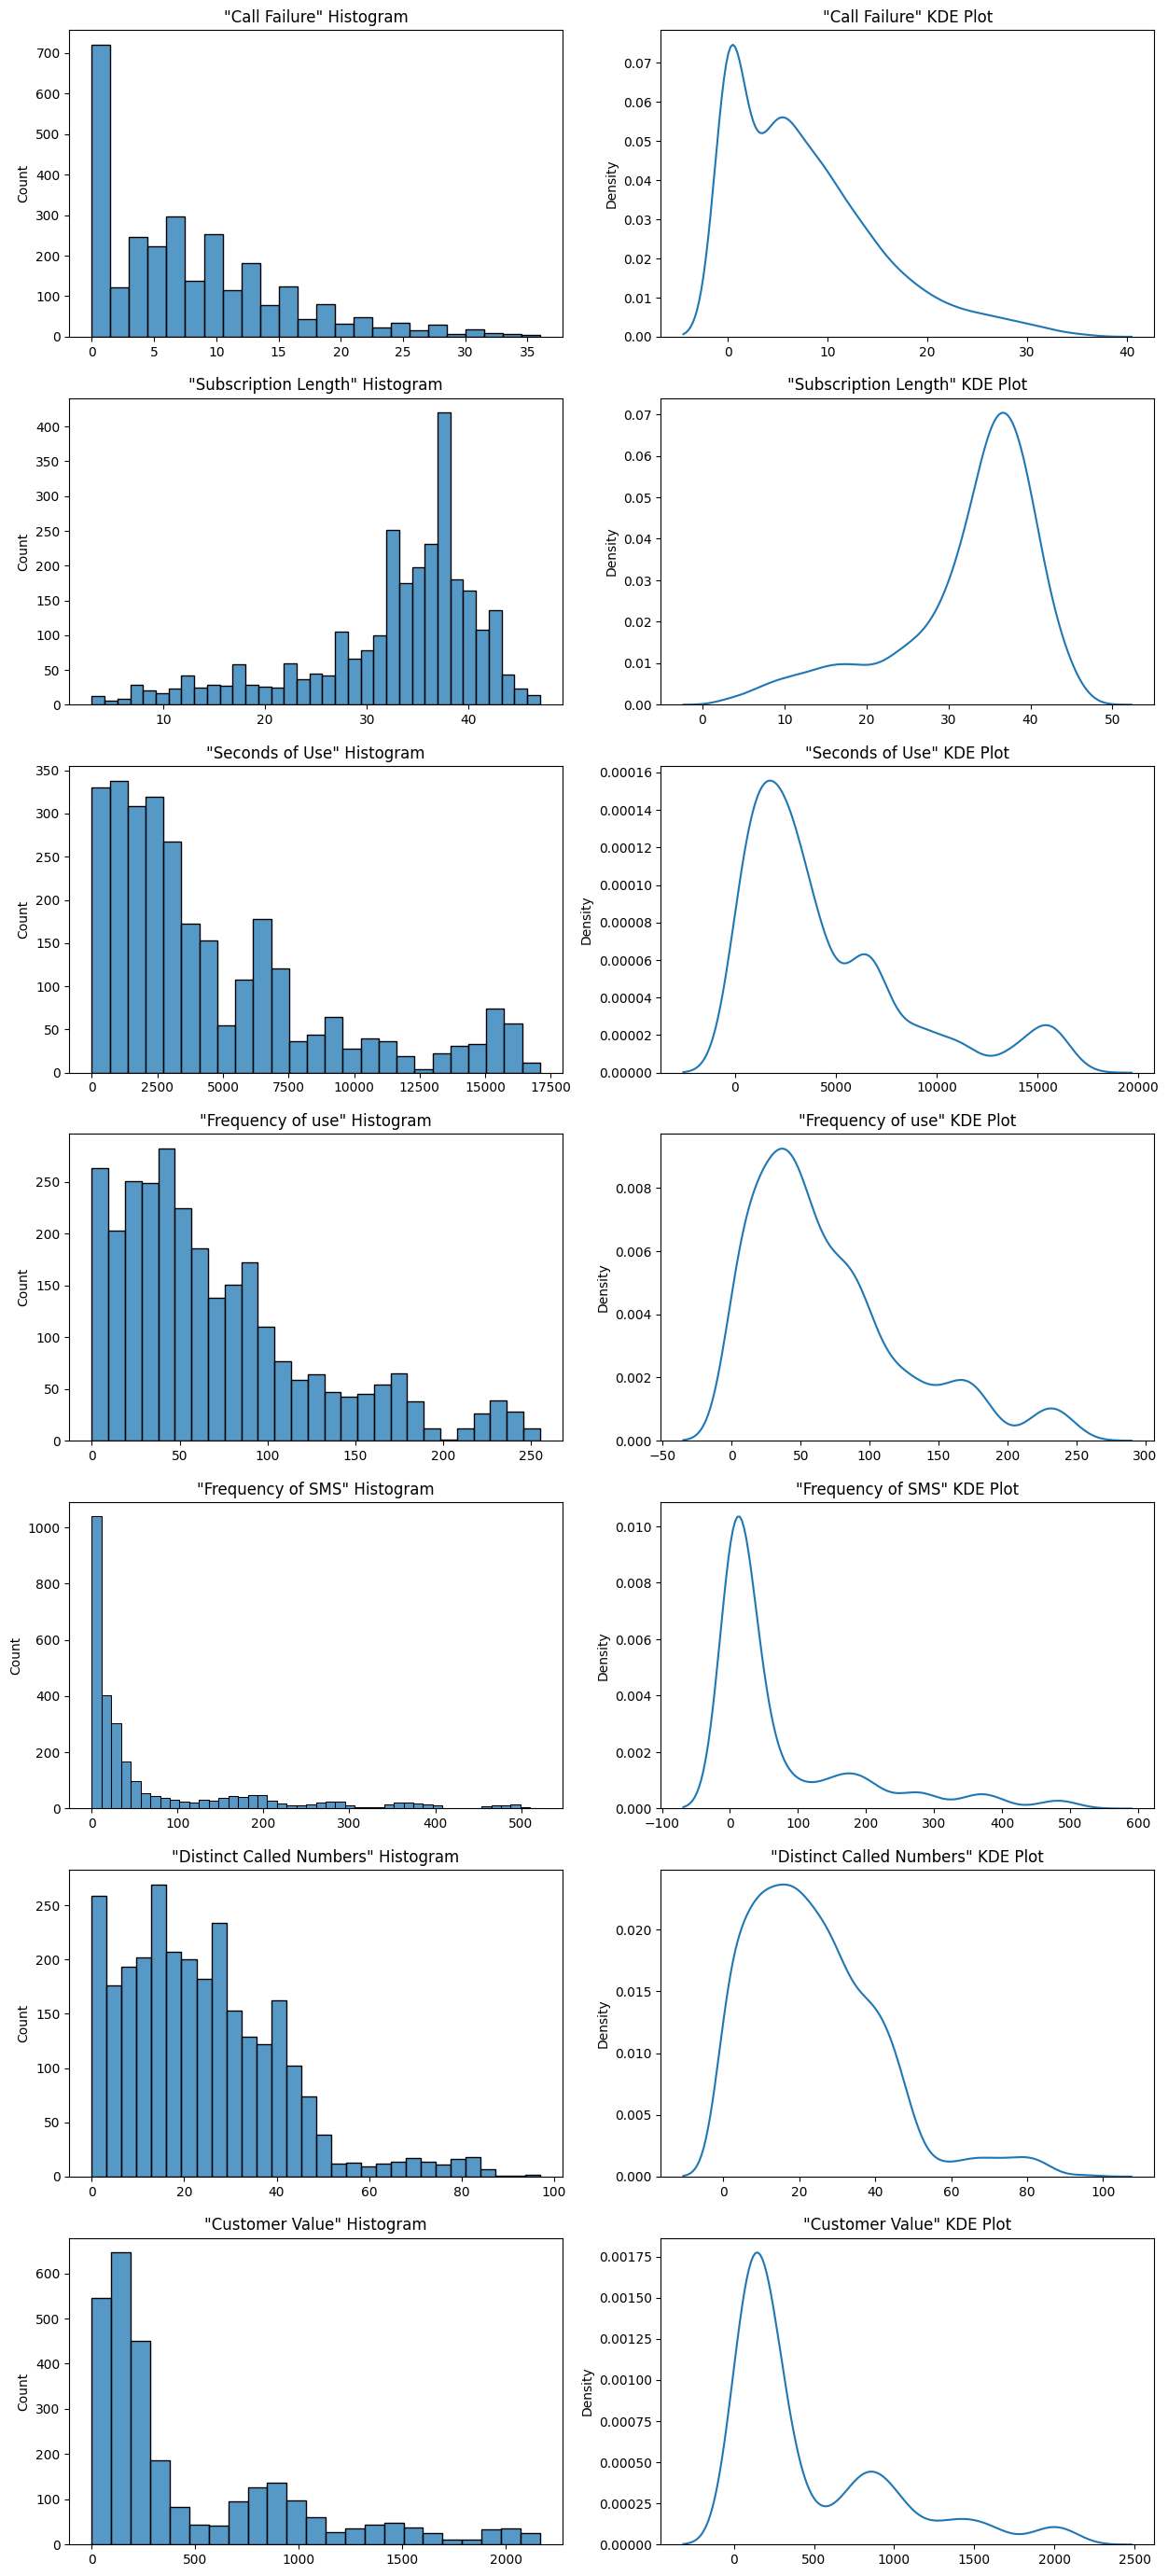

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_variables = df.select_dtypes(include="number")

_, axes = plt.subplots(
   nrows=len(numerical_variables.columns), 
   ncols=2,
   figsize=(15, 35)
)

for count, variable in enumerate(iterable=numerical_variables):
    sns.histplot(
        data=numerical_variables, 
        x=variable,
        bins="auto",
        ax=axes[count, 0]
    ).set(
        title=f'''"{variable}" Histogram''', 
        xlabel=None
    )
    
    sns.kdeplot(
        data=numerical_variables, 
        x=variable, 
        ax=axes[count, 1]
    ).set(
        title=f'''"{variable}" KDE Plot''', 
        xlabel=None
    )

Gambar di atas terdiri dari dua plot, yakni (1) histogram di sisi sebelah kiri dan (2) kernel density estimate (KDE) plot di sebelah kanan untuk tiap variabel numerik
1. A histogram groups values into bins of equal value range. 
    * parameter `bins` di histogram secara default set to `auto`, yang mengacu pada [minimum bin width between the 'sturges' and 'fd' estimators](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html). 
    * dengan demikian, jumlah bins diatur secara arbitrary, dan bentuk histogram pun akan berbeda sesuai dengan jumlah bins yang ditetapkan.
2. KDE plot can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram.
    * This is often a clearer way to grasp the distribution, because it does not depend on the size of the bins.
    * The area under the curve always adds up to 100%, and so the curve will never dip below the x-axis.

* You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. 
    * Histogram di atas juga menunjukkan bahwa hampir semua variabel memiliki positive skew (tail dari distribution memanjang ke arah kanan dari mass of distribution yang berada di sebelah kiri)
    * kecuali variabel `Subscription Length` yang memiliki negative skew
* The shape of the histogram and KDE plot may contain clues about the underlying distribution type: Gaussian, exponential, etc.
    * Knowing the distribution of the variabel (feature) becomes essential when we use predictive methods that assume a particular type (most often Gaussian).
    * dan dapat kita lihat secara visual seluruh variabel dalam dataset memiliki distribusi non-parametrik

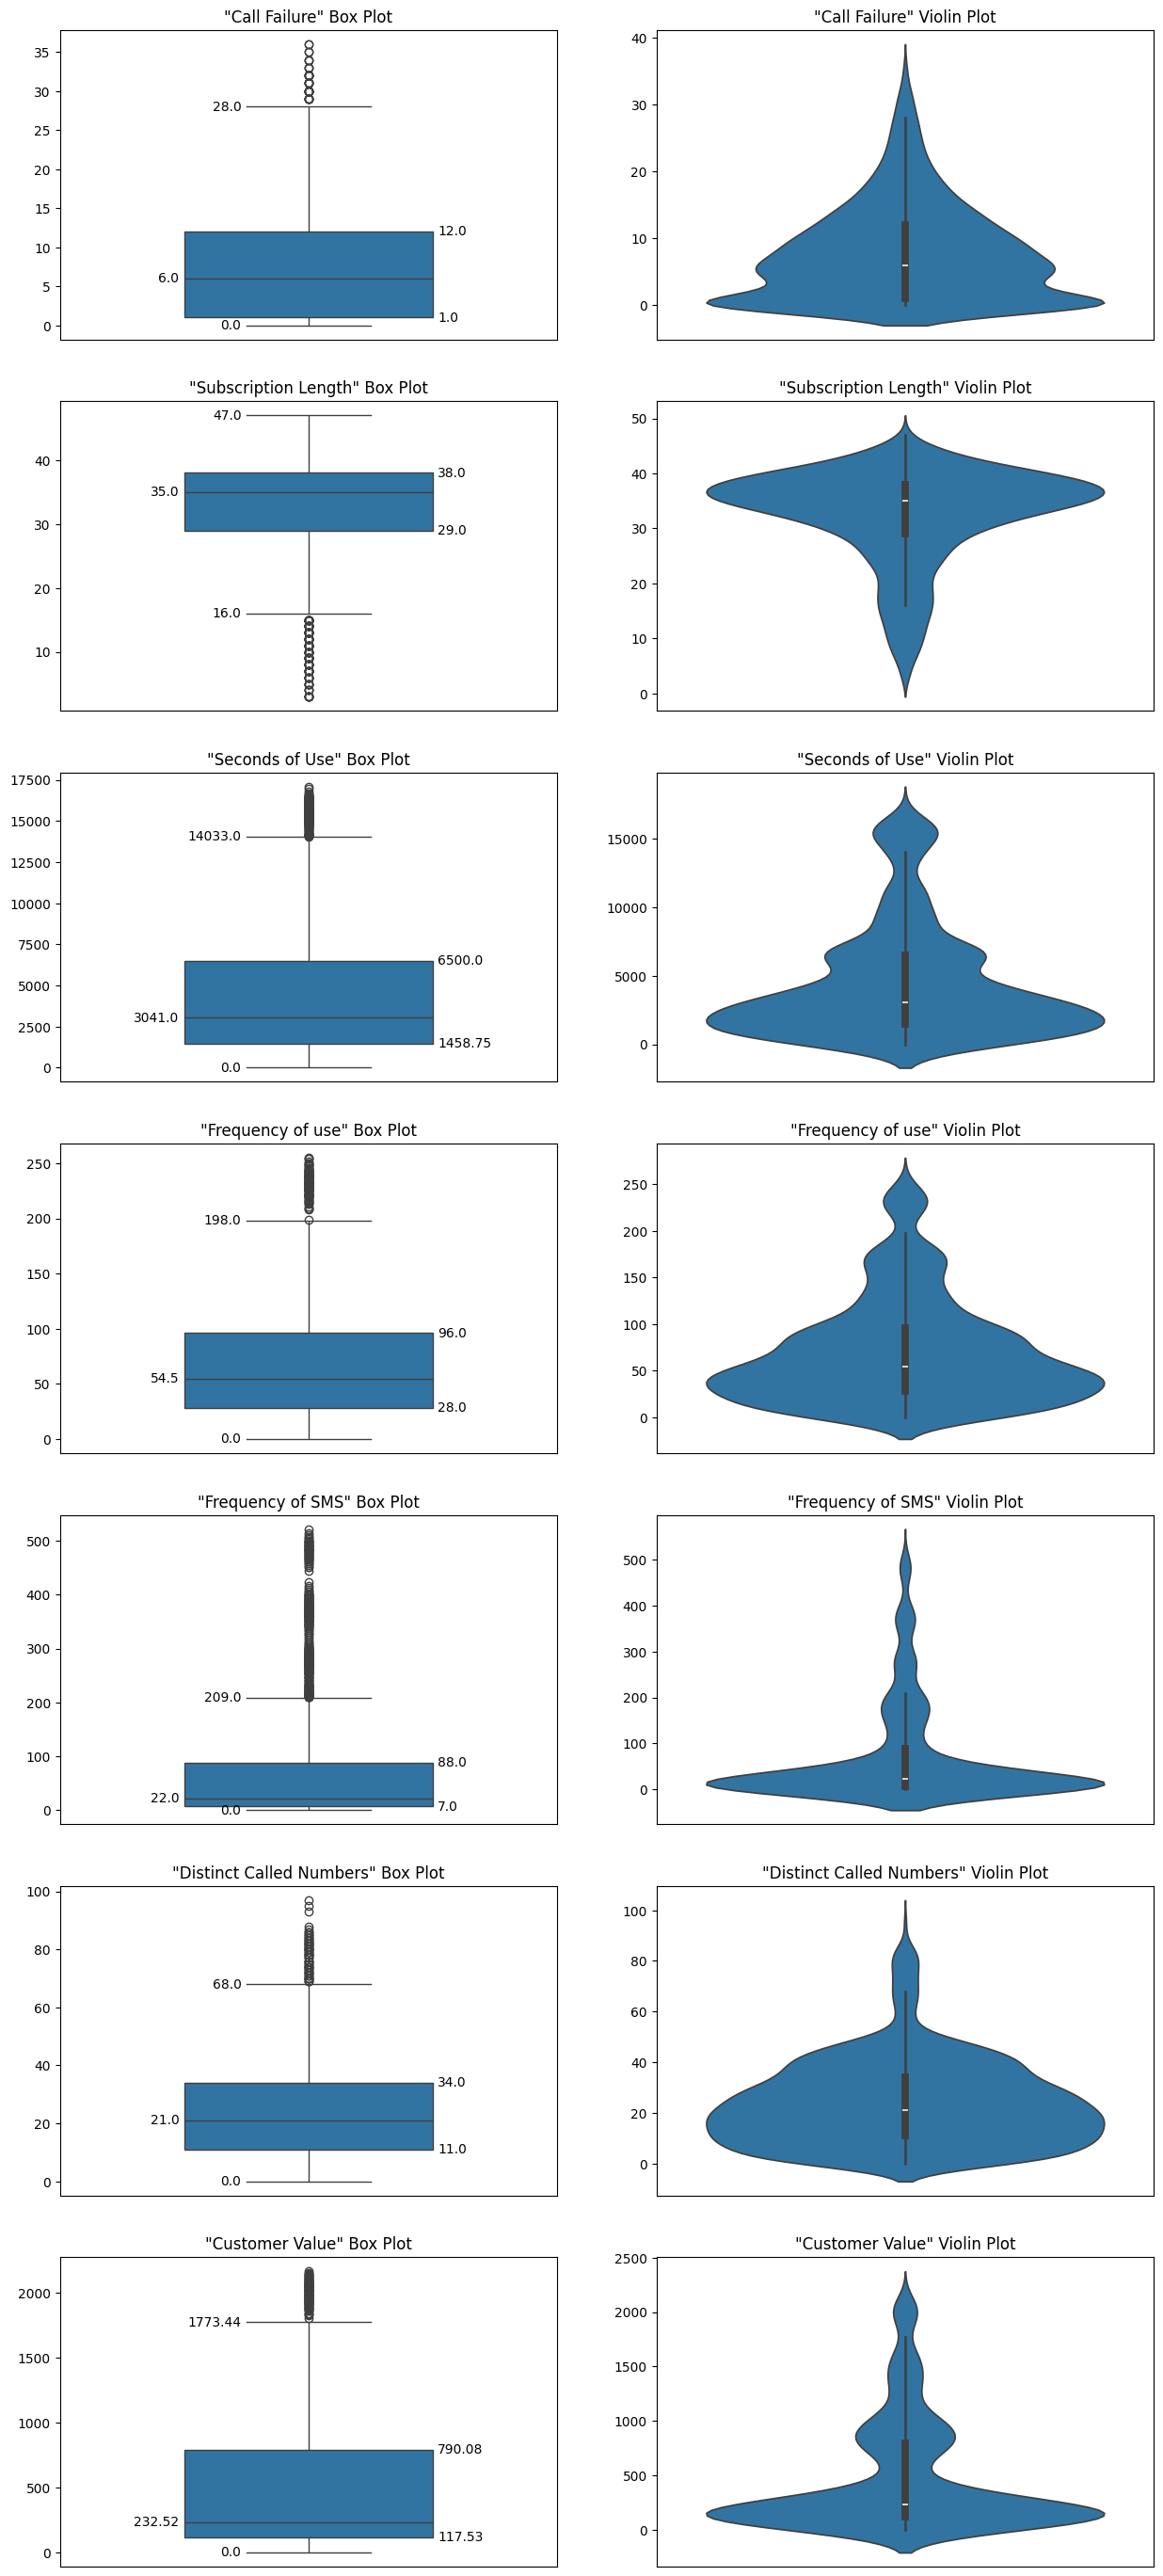

In [17]:
_, axes = plt.subplots(
   nrows=len(numerical_variables.columns), 
   ncols=2,
   figsize=(15, 35)
)

for count, variable in enumerate(iterable=numerical_variables):
    boxplot = sns.boxplot(
        data=numerical_variables[variable],
        width=0.5,
        ax=axes[count, 0]
    )

    boxplot.set_title(label=f'''"{variable}" Box Plot''')
    boxplot.set_ylabel(ylabel=None)
    boxplot.set_xticks(ticks=list())

    x_Q1, y_Q1 = boxplot.get_lines()[0].get_xydata()[0]
    boxplot.text(
        x=x_Q1 + 0.26, 
        y=y_Q1,
        s=round(
            number=y_Q1,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="left"
    )

    x_Q3, y_Q3 = boxplot.get_lines()[1].get_xydata()[0]
    boxplot.text(
        x=x_Q3 + 0.26, 
        y=y_Q3,
        s=round(
            number=y_Q3,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="left"
    )

    x_lower_bound, y_lower_bound = boxplot.get_lines()[2].get_xydata()[0]
    boxplot.text(
        x=x_lower_bound - 0.01, 
        y=y_lower_bound,
        s=round(
            number=y_lower_bound,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )

    x_upper_bound, y_upper_bound = boxplot.get_lines()[3].get_xydata()[0]
    boxplot.text(
        x=x_upper_bound - 0.01, 
        y=y_upper_bound,
        s=round(
            number=y_upper_bound,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )

    x_median, y_median = boxplot.get_lines()[4].get_xydata()[0]
    boxplot.text(
        x=x_median - 0.01, 
        y=y_median,
        s=round(
            number=y_median,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )
    
    sns.violinplot(
        data=df[variable],
        ax=axes[count, 1]
    ).set(
        title=f'''"{variable}" Violin Plot''',
        xticks=list(),
        ylabel=None
    )

Gambar di atas juga terdiri dari dua plot, yakni (1) box plot di sisi sebelah kiri dan (2) violin plot di sebelah kanan untuk tiap variabel numerik
1. [Box plot](https://en.wikipedia.org/wiki/Box_plot) is a method for demonstrating graphically the locality, spread and skewness of numerical data through their quartiles. Components of the plot are as follows:
    * The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25^{th}\;(Q1)$ and $75^{th}\;(Q3)$
    percentiles. Untuk contoh variabel `Customer Value` di atas, `Q1` dan `Q3` masing-masing bernilai `117.53` dan `790.08`
    * The horizontal line inside the box marks the median ($50\%$) of the distribution. Melanjutkan contoh sebelumnya, median dari `Customer Value` adalah `232.52`
    * The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(Q1-1.5\;\cdot\;IQR,\;Q3+1.5\;\cdot\;IQR)$, where $IQR=Q3-Q1$ is the interquartile range.
    * Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.
        * Pada contoh `Customer Value`, data di atas nilai `1773.44` merupakan outlier pada variabel ini
        * Dan tampak bahwa semua variabel memiliki outlier...

2. Violin plots have many of the same summary statistics as box plots:
    * The white dot represents the median
    * The thick gray bar in the center represents the interquartile range
    * The thin gray line represents the rest of the distribution, except for points that are determined to be “outliers”
    * On each side of the gray line is a kernel density estimation to show the distribution shape of the data. 
        * Wider sections of the violin plot represent a higher probability that members of the population will take on the given value
        * The skinnier sections represent a lower probability
        * visualisasi ini kurang lebih serupa dengan yang telah ditunjukkan oleh KDE plot sebelumnya

* In addition to graphical tools, the exact numerical statistics of the distribution are also provided below
    * Especially corresponding with the values provided in the box plot and violin plot
    * Its output is mostly self-explanatory. `25%`, `50%` and `75%` are the corresponding percentiles (`50%` juga bisa disebut dengan median)

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| **Outlier** | **Outlier issue detected** | **Analyzed further in `Section 4: Model Experimentation`** |

In [18]:
numerical_variables\
    .describe()\
        .round(decimals=2)

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
count,2850.00,2850.00,2850.00,2850.00,2850.00,2850.00,2850.00
mean,7.80,32.45,4534.24,70.48,73.79,23.87,474.99
std,7.33,8.72,4199.71,57.40,112.06,17.19,514.44
min,0.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,29.00,1458.75,28.00,7.00,11.00,117.53
50%,6.00,35.00,3041.00,54.50,22.00,21.00,232.52
75%,12.00,38.00,6500.00,96.00,88.00,34.00,790.08
max,36.00,47.00,17090.00,255.00,522.00,97.00,2165.28


Sejauh ini, normality assessment —apakah suatu variabel memiliki distribusi normal— terhadap variabel dalam dataset ditentukan dengan metode visual/grafik, yakni dengan penggunaan visualisasi histogram/KDE plot dan boxplot/violin plot.
* Masih terdapat satu teknik visualisasi yakni [Q-Q Plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) which plots normal theorical quantiles against the actual quantiles of the variable. namun dua pasang visualisasi sebelumnya telah dirasa cukup memadai.
* Selain ini, metode statistik yang disebut dengan [uji normalitas](https://en.wikipedia.org/wiki/Normality_test) juga dapat digunakan untuk determine if a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

In [19]:
from scipy.stats import norm, kstest, shapiro, normaltest
from statsmodels.stats.diagnostic import lilliefors

kstest_stat = list()
kstest_pval = list()

for variable in numerical_variables.columns:

    variable_loc, variable_scale = norm.fit(data=numerical_variables[variable])
    variable_norm = norm(loc=variable_loc, scale=variable_scale)

    kstest_stat.append(kstest(
        rvs=numerical_variables[variable],
        cdf=variable_norm.cdf
    )[0])
    kstest_pval.append(kstest(
        rvs=numerical_variables[variable], 
        cdf=variable_norm.cdf
    )[1])

pd.DataFrame(data={
    "skewness": numerical_variables.apply(func=lambda variable: variable.skew()).values,
    "kurtosis": numerical_variables.apply(func=lambda variable: variable.kurt()).values,
    "kstest_pval": kstest_pval,
    "lilliefors_pval": numerical_variables.apply(lambda variable: lilliefors(x=variable)[1]).values,
    "swtest_pval": numerical_variables.apply(lambda variable: shapiro(x=variable)[1]).values,
    "normaltest_pval": numerical_variables.apply(lambda variable: normaltest(a=variable)[1]).values
}).set_index(keys=numerical_variables.columns)

,skewness,kurtosis,kstest_pval,lilliefors_pval,swtest_pval,normaltest_pval
Call Failure,1.067233,0.836686,1.343817e-51,0.001,1.865751e-40,2.188774e-91
Subscription Length,-1.252843,1.065209,4.920996e-70,0.001,4.173448e-42,4.303336e-116
Seconds of Use,1.314737,0.960960,6.990924e-60,0.001,2.598222e-46,2.781258e-121
Frequency of use,1.145862,0.809503,1.429735e-34,0.001,2.640505e-40,9.424636e-100
Frequency of SMS,1.971020,3.257231,7.019604e-190,0.001,1.601993e-58,1.179009e-229
Distinct Called Numbers,1.039277,1.385968,2.574216e-17,0.001,2.181919e-34,1.186742e-97
Customer Value,1.422214,1.218141,3.524036e-131,0.001,1.245687e-50,9.510277e-138


*Notes:*
* *`Skewness` is calculated using [adjusted Fisher–Pearson standardized moment coefficient $G1$](https://en.wikipedia.org/wiki/Skewness#Sample_skewness), with positive value indicates variable with positive distribution or right-skewed, and so otherwise for the negative value.*
* *`Kurtosis` is also calculated using [adjusted Fisher-Pearson standardized moment coefficient $G2$](https://en.wikipedia.org/wiki/Kurtosis#Standard_unbiased_estimator), with [excess kurtosis](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis) value above 3 indicating variable with more extreme outliers than normal distribution (leptokurtic), and otherwise for below 3 (mesokurtic).*
* *P-value of normality tests used (Kolmogorov-Smirnov, Lilliefors, Shapiro-Wilk, and D'Agostino-Pearson's omnibus test of normality, respectively) below [critical value](https://en.wikipedia.org/wiki/Statistical_hypothesis_test#Critical_value) (0.05 or 5e-2) indicates that we may reject the null hypotheses and assumes that the variable is not normally distributed (non-parametric).*
    * *For `lilliefors_pval`, the values are linearly interpolated:*
        * *Values outside the range of 0.2 to 0.001 will be returned as bounds.*
        * *0.2 for large upper-bound and 0.001 for small lower-bound of p-values.*
* **lengkapi**

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Outlier | Outlier issue detected | Analyzed further in `Section 4: Model Experimentation` |
| **Normality** | **Normality issue detected** | **Analyzed further in `Section 4: Model Experimentation`** |

#### Categorical Variable

Berikutnya adalah analisis untuk categorical variables, which take on a fixed number of values. 
* Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. 
* Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. 
* If the values of a categorical variable are ordered, it is called ordinal.
* Seperti halnya dalam variabel numerik, visualisasi berikut akan menampilkan 6 categorical variable yang terbagi dalam 2 baris dan 3 kolom
* Target variabel `Churn` akan dibahas secara terpisah dan tidak disertakan dalam tahap ini

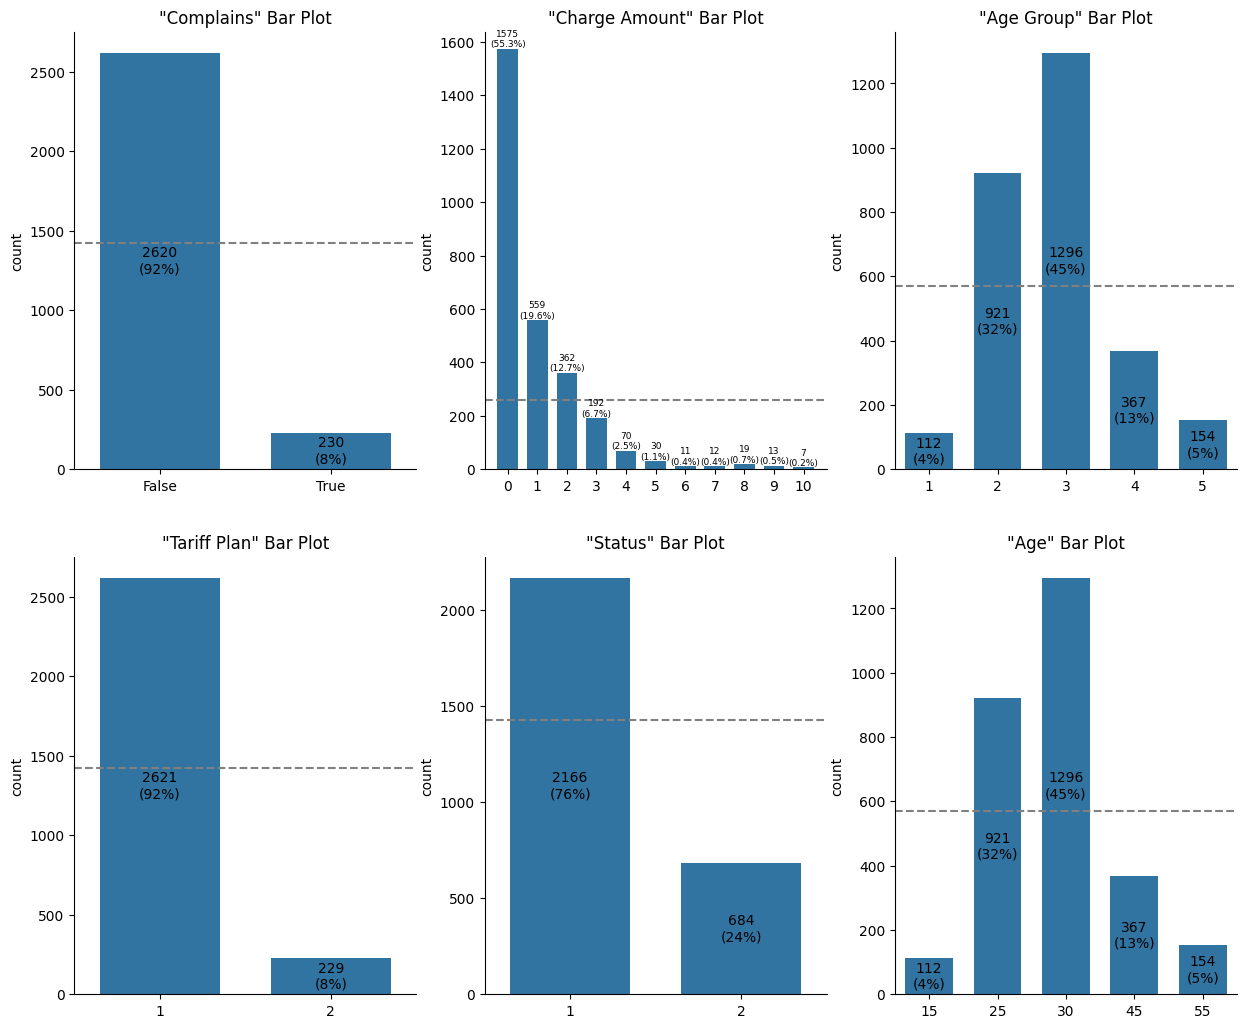

In [20]:
plt.figure(figsize=(15, 12.5))

def plot_univariate_categorical(ndigits=None, label_type="center", fontsize=10):
    plt.subplot(2, 3, count + 1)

    data = pd.concat(
        objs=[df[variable].value_counts().sort_index(),
              df[variable].value_counts(normalize=True).mul(other=100)],
        axis=1
    )

    axes = sns.barplot(
        data=data, 
        x=data.index,
        y="count",
        width=0.7
    )

    axes.set_title(label=f'''"{variable}" Bar Plot''')
    axes.set_xlabel(xlabel=None)
    axes.spines.top.set_visible(b=False)
    axes.spines.right.set_visible(b=False)

    plt.axhline(
        y=df[variable].value_counts().mean(),
        color="grey",
        linestyle="dashed"
    )

    labels = [f"{round(value.get_height())}\n({round(number=data.iloc[index, 1], ndigits=ndigits)}%)"
              for index, value in enumerate(axes.containers[0])]
    
    axes.bar_label(
        container=axes.containers[0], 
        labels=labels, 
        label_type=label_type,
        fontsize=fontsize
    )

    return axes

categorical_variables = df.select_dtypes(include=["bool", "object"]).drop(columns="Churn")

for count, variable in enumerate(iterable=categorical_variables):
    if variable == "Charge Amount":
        axes = plot_univariate_categorical(
            ndigits=1,
            label_type="edge",
            fontsize=6.5
        )
        axes.margins(0.04)
    elif variable == "default":
        plot_univariate_categorical(
            label_type="edge",
            fontsize=9
        )
    else:
        plot_univariate_categorical()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

* Histograms are best suited for looking at the distribution of numerical variables, while bar plots are used for categorical variables.
* The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
* The histogram’s X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. 
    * Still, it is useful to note that the bars are often sorted by height —that is, the frequency of the values— seperti yang ditunjukkan pada binary variable `Complains`, `Tariff Plan`, dan `Status`
    * nilai proporsi dari frekuensi tersebut terhadap total data juga disertakan dalam format persentase
    * Also, when we consider ordinal variables (like `Charge Amount`, `Age Group`, and `Age` in our data), the bars are usually ordered by variable value

Interpretasi dari bar plot di atas adalah sebagai berikut:
* Binary variables: mayoritas pelanggan Telecom tidak melayangkan `Complains`, Tariff Plan bertipe `Pay as you go (1)`, dan berstatus sebagai pelanggan `Active (1)` pada Iranian Telecom
* Ordinal variables: kebanyakan pelanggan memiliki Charge Amount yang relatif rendah (berkisar antara `0 - 2`) dan berada pada kelompok usia `2 - 3`
    * But, as we want to be able to predict the minority class, we may be more interested in how the fewer accepting customers behave. 
    * It may well be other values (occupation) in `job` bar plot contains most of our subscribers.
    * *Untuk feature `Age` tampak bahwa distribusinya sama persis dengan feature `Age Group`. analisis pada bagian berikutnya ... dapat memberikan konfirmasi lanjutan apakah kedua variabel ini sama persis atau memiliki perbedaan*

Selain itu, perlu diperhatikan juga bahwa terdapat beberapa label dalam variabel kategorikal tertentu dengan proporsi yang lebih rendah relatif terhadap label lainnya dalam variabel yang sama
* Batasan yang digunakan umumnya bersifat arbitrary (misal 1% atau 5% dari total proporsi label tersebut); dalam project ini digunakan nilai rata-rata dari frekuensi tiap label untuk menentukan label yang jarang muncul atau sering disebut dengan rare label
* Pada contoh variabel `Charge Amount`, maka label dengan frekuensi di bawah rata-rata mulai dari `3 - 10` akan ditentukan sebagai rare label
* Untuk feature binary yang hanya terdiri dari 2 label, akan terdapat 1 predominant category, sehingga label lainnya secara otomatis menjadi rare label karena berada di bawah rerata jumlah count dari 2 label
* Rare label menjadi permasalahan utama dalam tahapan prediksi data, yakni menentukan apakah rare label memang memiliki kemampuan prediktif atau hanya sebagai noise yang menurunkan kemampuan model untuk generalized terhadap new data.

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Outlier | Outlier issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Normality | Normality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| **Rare Label** | **Rare label issues detected** | **Analyzed further in `Section 4: Model Experimentation`** |

#### Target Variable

In [21]:
pd.concat(
    objs=[df["Churn"].value_counts(),
          df["Churn"].value_counts(normalize=True).round(decimals=2)],
    axis=1
)

,count,proportion
Churn,,
False,2404,0.84
True,446,0.16


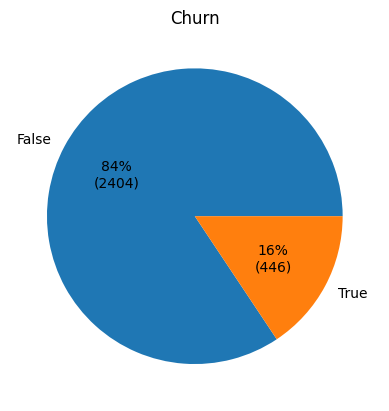

In [22]:
def autopct_function(percentage, x):
    absolute = int(round(number=percentage/100 * sum(x)))
    return f'{percentage:.0f}%\n({absolute:d})'

x = df["Churn"].value_counts()

plt.pie(
    x=x,
    labels=x.index.get_level_values(level=0),
    autopct=lambda pct: autopct_function(percentage=pct, x=x), 
)

plt.title(label=f'{x.index.names[0]}')

plt.show()

Analisis ini terdiri dari 2 bagian:
1. Frequency table shows how frequent each value of the categorical variable is. By default, the entries in the output are sorted from the most to the least frequently occurring values.
2. A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents, yakni proporsi dari value di dalam target `y (Churn)`

In our case, the data is not balanced; that is, our two target classes are not represented equally in the dataset. 
* `False` menandakan customer yang tetap menjadi pelanggan Telecom, dan `True` adalah sebaliknya
* Only a small part (`16%`) of the clients yang Churn dari Iranian Telecom dalam satu periode (9 bulan)
* ...

The share of non-churn clients in the dataset is `84`%. 
* The most naive model that always predicts a “non-churn customer” on such data will guess right in about 84% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher
* We got the baseline metric without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase accuracy by only 0.5%, persay, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple “if-else” model with this condition

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Outlier | Outlier issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Normality | Normality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Rare Label | Rare label issues detected | Analyzed further in `Section 4: Model Experimentation` |
| **Imbalanced Data** | **Imbalanced data detected** | **Analyzed further in `Section 4: Model Experimentation`** |

### Multivariate Analysis

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### Numerical vs. Numerical

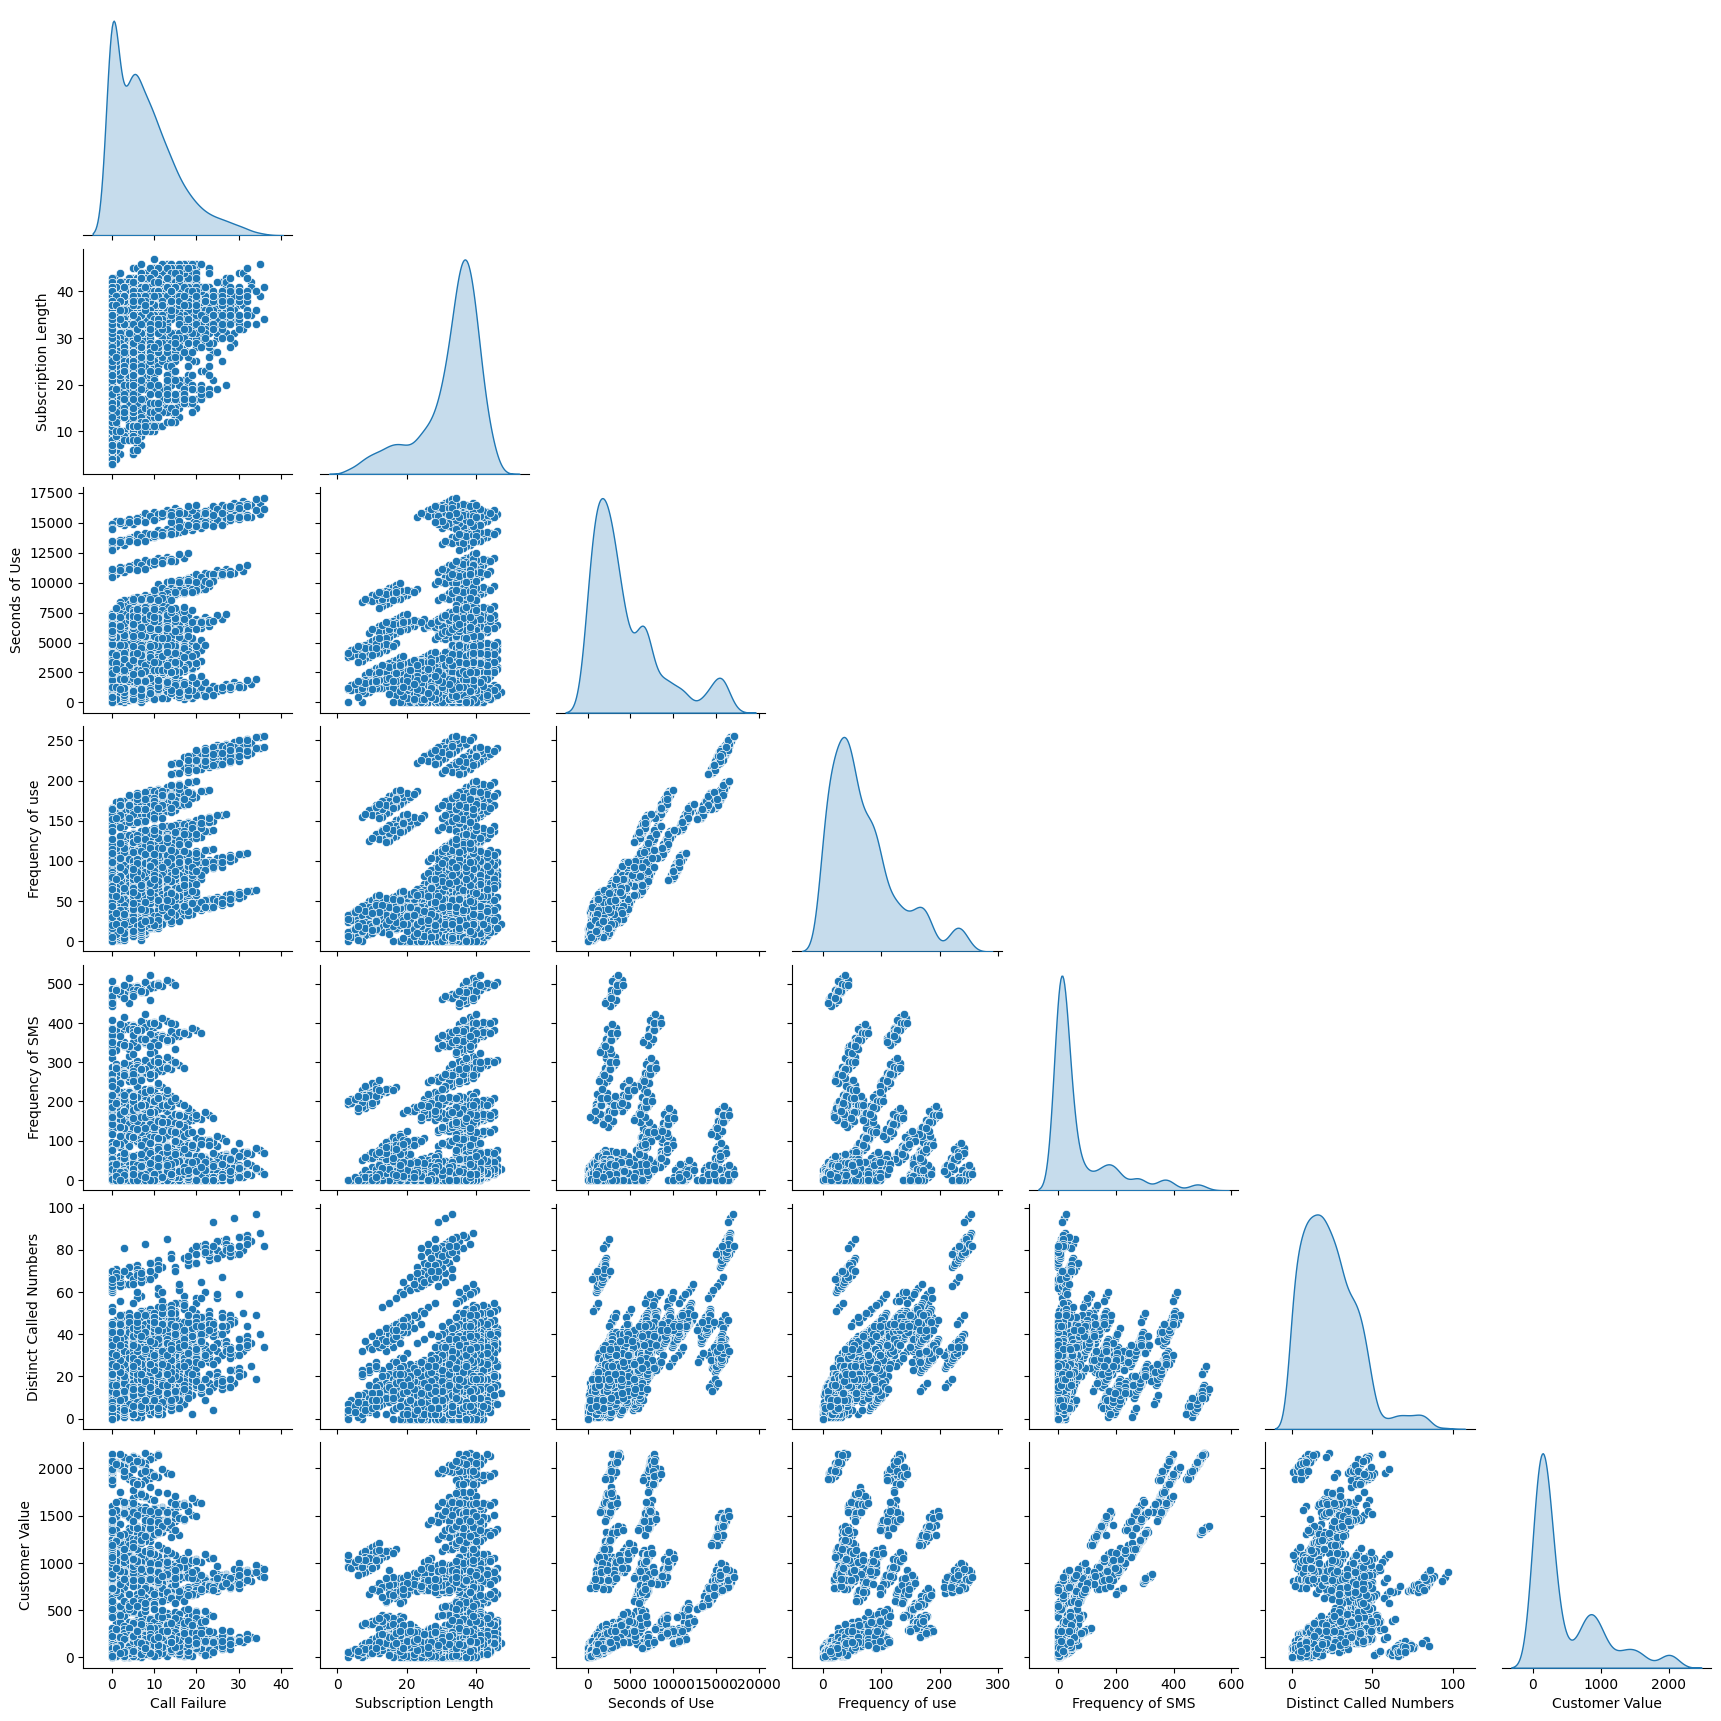

In [23]:
axes = sns.pairplot(
    data=numerical_variables,
    corner=True,
    diag_kind="kde"
)

visualisasi antara variabel numerik menggunakan scatter plot dalam format pairwise relationships plot (`pairplot`)
* scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. 
    * It consists of multiple data points plotted across two axes. 
    * Each variable depicted in a scatter plot would have multiple observations/points
    * Scatter plot helps in visualizing 2 numeric variables. It helps in identifying the relationship of the data with each variable, i.e. correlation or trend patterns. 
* dan dalam format pairplot, scatter plots for each pair of variables fill the rest of the matrix.
    * The diagonal plots are treated differently: a univariate distribution plot (`kde` untuk menghilangkan efek dari arbitrary bins) is drawn to show the marginal distribution of the data in each column.
    * sebagaimana halnya pada `correlation_matrix` yang bersifat simetris, visualisasi pairplot tidak menyertakan upper triangle `corner` karena serupa dengan lower triangle pada plot di atas

pola scatter plot pada tiap pasangan variabel berkaitan dengan distribusi tiap variabel tersebut
* ambil contoh `Call Failure` dengan skewness positif dan mass of the distribution (density) concentrated on the left side of the kde plot, dikaitkan dengna `Subscription Length` dengan skewness negatif dan mass of the distribution on the right side, maka scatter plotnya menghasilkan titik data yang juga terkonsentrasi/mengumpul pada sisi kanan atas (low `Call Failure` with high `Subscription Length`)
* untuk pasangan variabel dengan pola distribusi yang hampir serupa seperti yang dicontohkan dari `Frequency of Use` dan `Seconds of Use`, maka scatter plotnya membentuk pola almost linear
    * seiring bertambahnya nilai pada `Frequency of Use`, nilai `Seconds of Use` juga turut meningkat
    * ini juga merupakan representasi visual dari nilai koefisien korelasi pada plot heatmap sebelumnya

Inspection of the scatterplot between X and Y will typically reveal a situation where lack of robustness might be an issue
* "longtailedness" (e.g., when the distribution of the data has longer tails than the assumed normal distribution)
* This implies that they will be strongly affected by the presence of outliers in the data, and the estimates they produce may be heavily distorted if there are extreme outliers in the data, compared to what they would be if the outliers were not included in the data.
* it may be advisable to use a robust measure of association for the next visualization

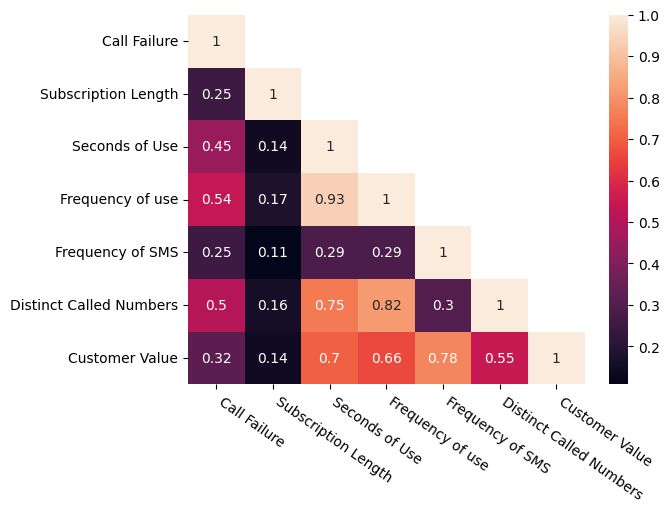

In [24]:
import numpy as np

numerical_correlation_matrix = numerical_variables.corr(
    method="spearman",
    numeric_only=True
)

mask = np.triu(np.ones_like(a=numerical_correlation_matrix))
np.fill_diagonal(
    a=mask,
    val=False
)

axes = sns.heatmap(
    data=numerical_correlation_matrix, 
    annot=True,
    mask=mask
)

plt.setp(
    obj=axes.xaxis.get_majorticklabels(), 
    rotation=-35, 
    ha='left'
)

plt.show()

visualisasi ini juga terdiri dari 2 bagian sebagai berikut:
1. `correlation_matrix` mengukur correlation or dependence, that is any statistical relationship, whether causal or not, between two variables or bivariate data. 
    * Although in the broadest sense, "correlation" may indicate any type of association, in statistics it usually refers to the degree to which a pair of variables are linearly related.
    * ukuran dari korelasi tersebut menggunakan...
    * Correlations are useful because they can indicate a predictive relationship that can be exploited in Machine Learning practice: there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables (features) well.
2. rectangular data dari hasil perhitungan `correlation_matrix` ditunjukkan dalam bentuk color-encoded matrix atau umum disebut heatmap
    * A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two dimensions.
        * The values of the first dimensions appear as rows of the table, while the values of the second dimension are represented by the columns of the table.
        * The diagonal elements of the matrix represent the correlation of a variable with itself (misal `Call Failure` dengan `Call Failure`)
        * The correlation matrix is symmetrical, meaning the correlation between column $i$ and column $j$ is the same as the correlation between column $j$ and column $i$. sehingga untuk mempermudah interpretasi, efek simetri ini dihilangkan dengan tidak menyertakan *upper triangle* dari `correlation_matrix`
    * A heatmap contains values representing various shades of the same color for each value to be plotted. 
        * the lighter shades of the chart represent higher values than the darker shade. 
        * dan juga untuk mempermudah interpretasi, anotasi untuk tiap cell disertakan pada heatmap ini

#### Numerical vs. Categorical

untuk analisis multivariat antara variabel numerik dan variabel kategorikal, secara spesifik variabel kategorikal yang akan dipilih adalah variabel utama yang menjadi fokus analisis pada project ini yaitu target variabel `Churn`.
* More specifically, let’s see how the input variables are related to the target variable Churn.
* analisis berikut akan menyertakan target variable pada dataframe yang berisikan numerical features dan secara sekaligus menggunakan pairplot dan hue sehingga their points are color-coded so that the values of a third categorical variable `Churn` are also presented in the same figure

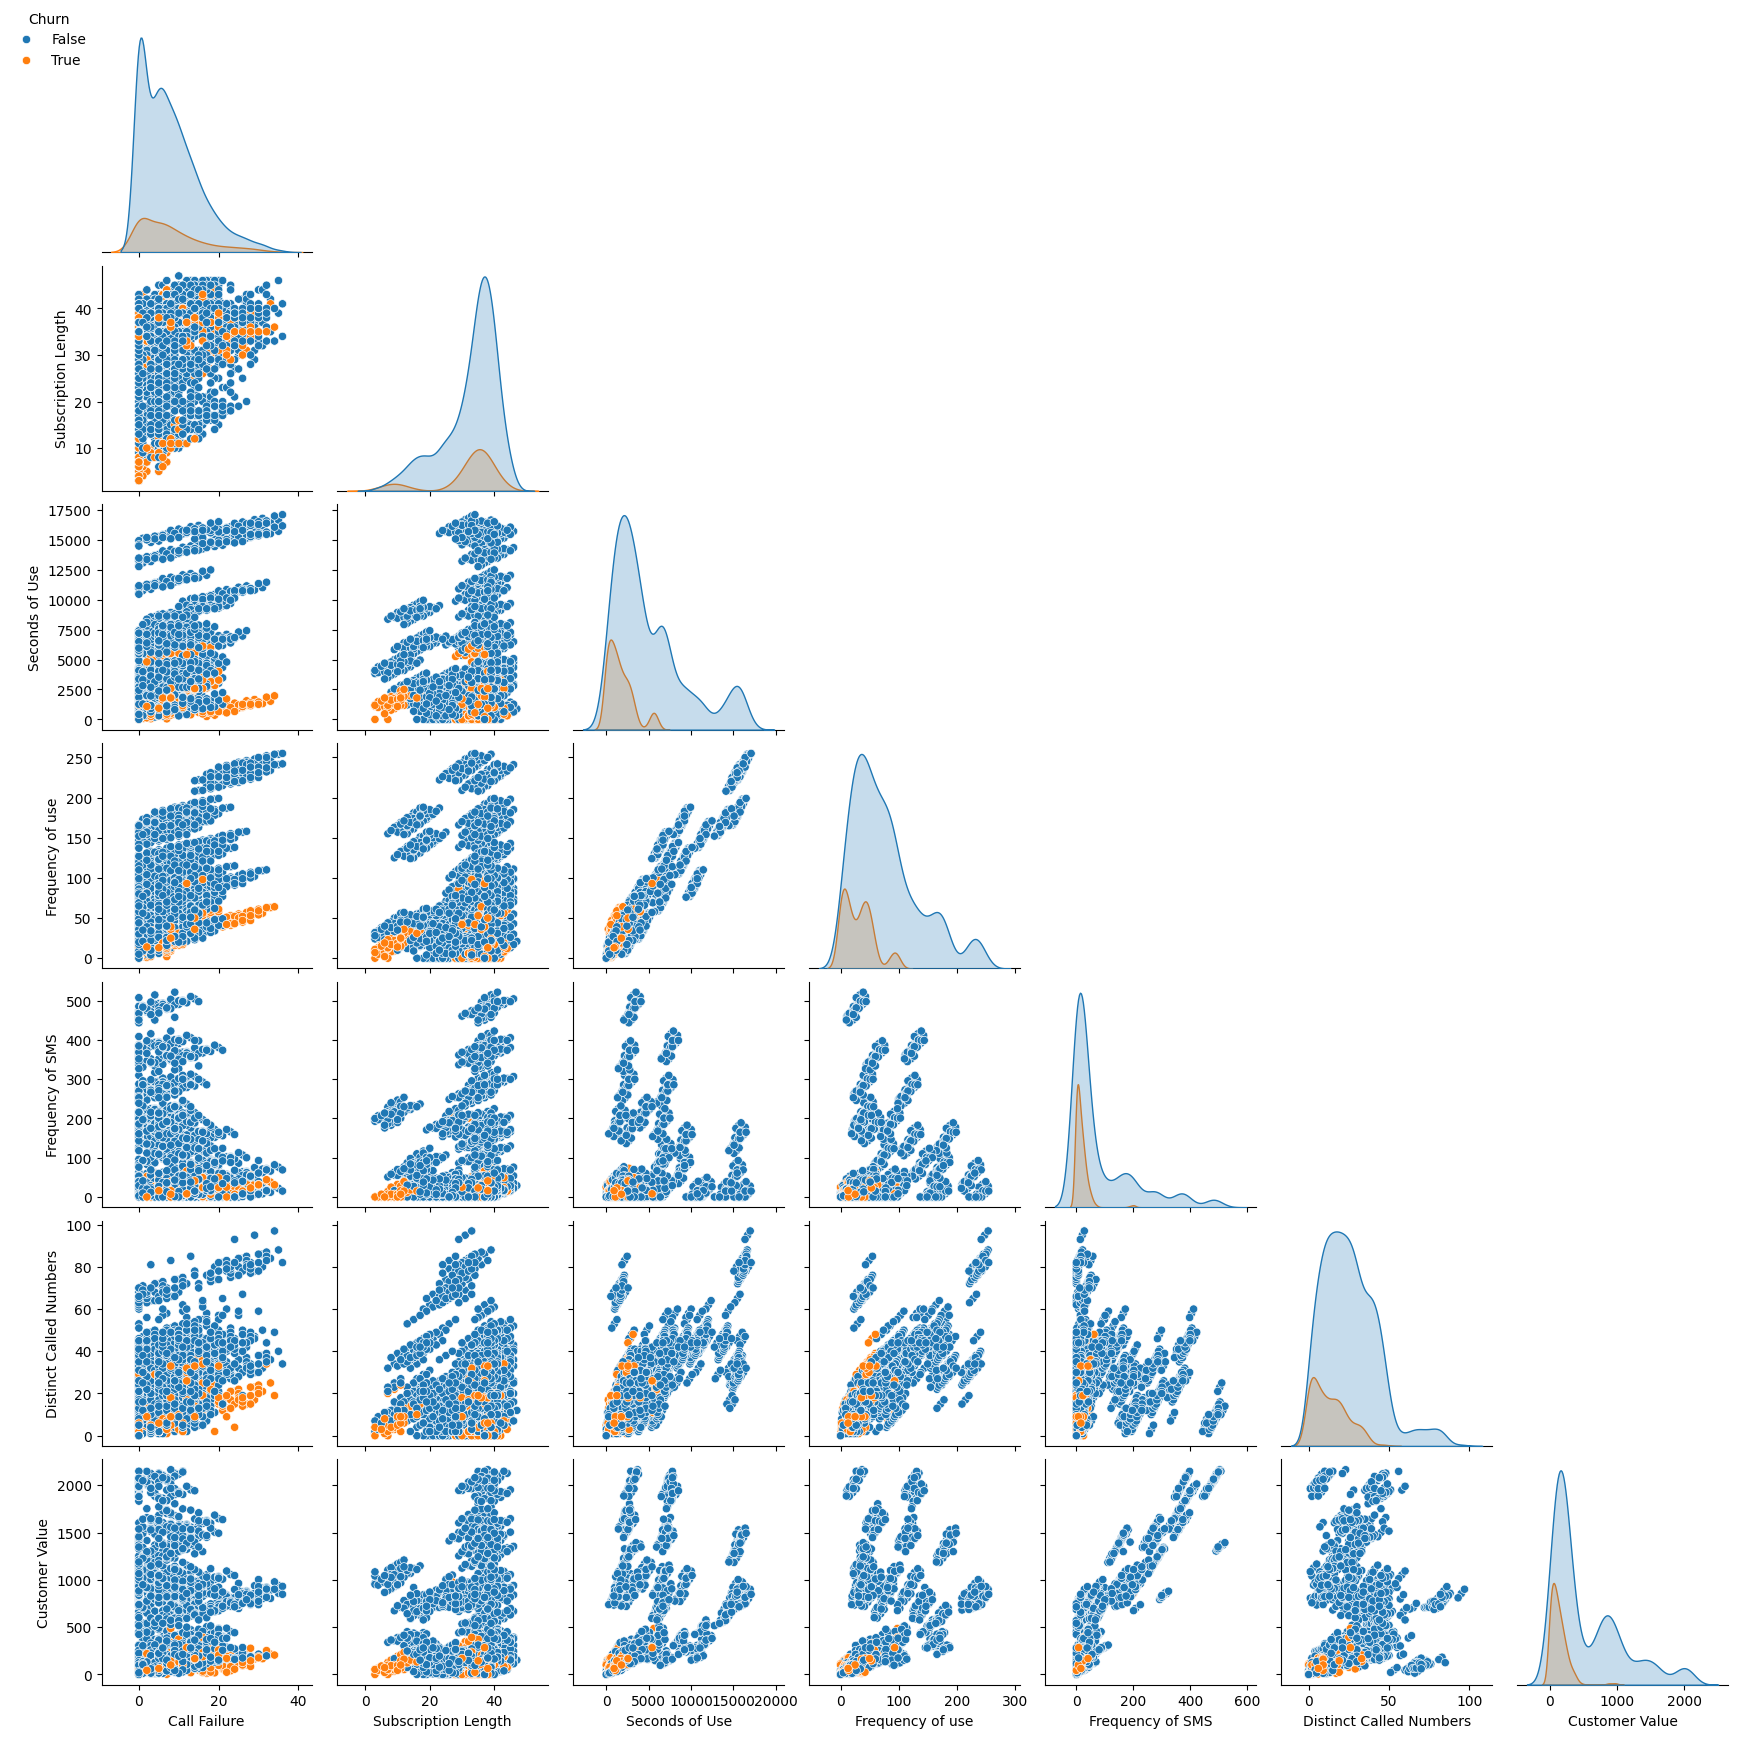

In [25]:
numerical_target = pd.concat(
    objs=[numerical_variables, df["Churn"]],
    axis=1
)

axes = sns.pairplot(
    data=numerical_target,
    hue="Churn",
    corner=True
)

axes.legend.set_loc(loc="upper left")

untuk pasangan variabel tertentu, pola hubungan dari target variabel dengan pairwise numerical variables dapat terbaca. 
* misal pada `Frequency of Use` dan `Seconds of Use`, small proportion of disloyal customers lean towards the bottom-left corner; that is, such customers tend to spend less time on calls and in itself not a frequent callers. 
* But this is not absolutely clear —seperti halnya pola churned customers pada pairwise features lainnya—, and we won’t make any definitive conclusions from this.

visualiasi berikutnya adalah box plots untuk menggambarkan the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn = False`) and those who left (`Churn = True`).

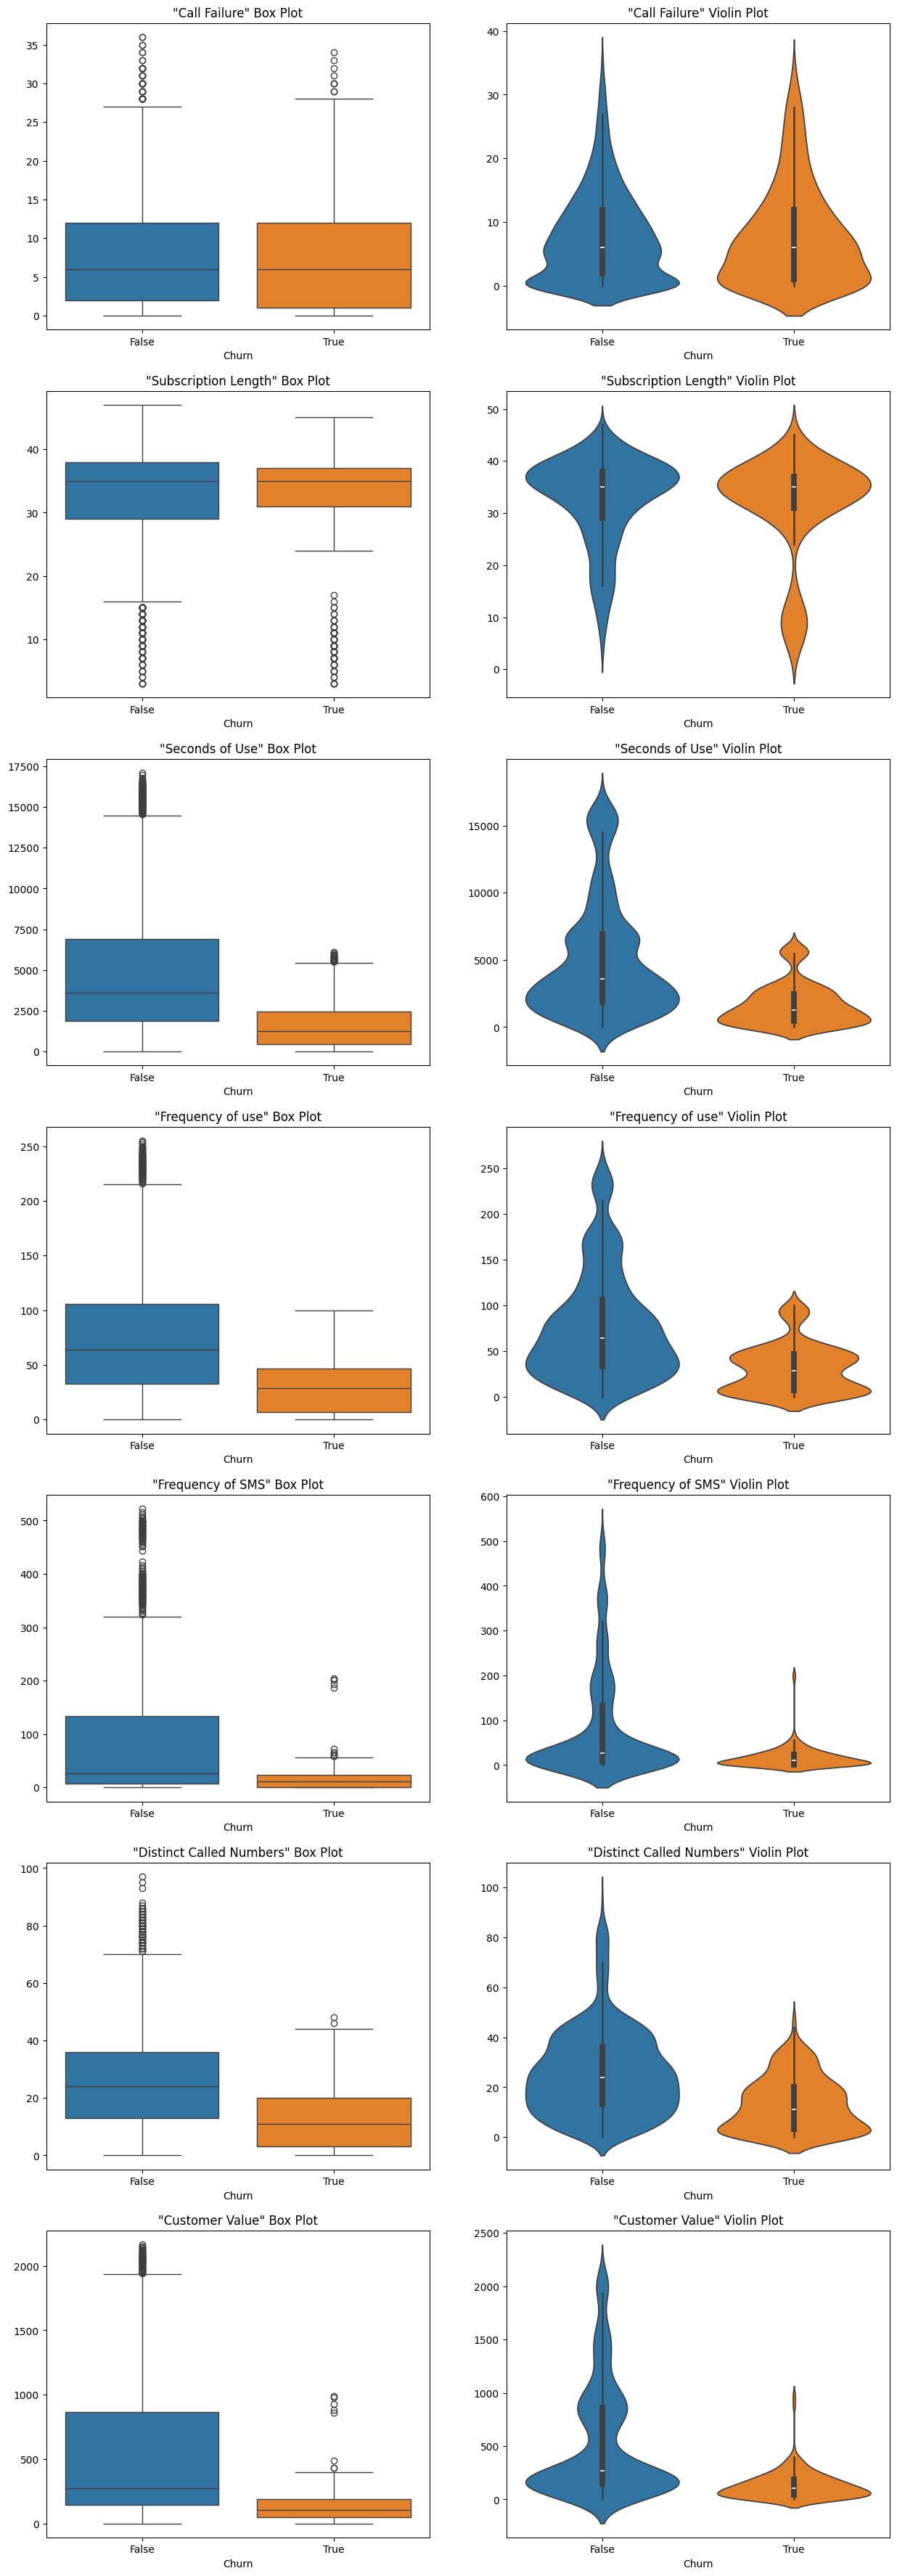

In [26]:
_, axes = plt.subplots(
   nrows=len(numerical_variables.columns), 
   ncols=2,
   figsize=(15, 45)
)

for count, variable in enumerate(iterable=numerical_variables):
    sns.boxplot(
        data=df,
        x="Churn",
        y=variable,
        hue="Churn",
        legend=False,
        ax=axes[count, 0]
    ).set(
        title=f'''"{variable}" Box Plot''',
        ylabel=None
    )
    
    sns.violinplot(
        data=df,
        x="Churn",
        y=variable,
        hue="Churn",
        legend=False,
        ax=axes[count, 1]
    ).set(
        title=f'''"{variable}" Violin Plot''',
        ylabel=None
    )

dari chart ini dapat kita identifikasi beberapa temuan berikut:
* distribusi pada `Call Failure` dan `Subscription Length` untuk dua kelompok `Churn` hampir serupa, mulai dari bentuk hingga elemen di dalam plot tersebut seperti Q1, Q3, lower boundary, upper boundary, dan mediannya. 
    * meskipun ada noticable difference in `Subscription Length` lower boundaries, tapi secara overall subset kedua variabel ini hampir sama
    * hal ini menandakan potensi kurang adanya pembeda antara disloyal dan loyal customers jika ditinjau dari `Call Failure` dan `Subscription Length`
* hal sebaliknya ditunjukkan pada variabel `Seconds of Use`, `Frequency of use`, `Frequency of SMS`, `Distinct Called Numbers`, dan `Customer Value`
    * dapat diinterpretasikan bahwa mayoritas churned customers menggunakan jasa telekomunikasi dari Telecom dalam kurun waktu yang singkat dan jarang (baik dalam bentuk telepon maupun SMS), mereka tidak banyak berkomunikasi dengan orang yang berbeda (kebanyakan orang yang sama), dan Telecom pun memberikan customer value yang lebih rendah kepada mereka.
    * ada dua hipotesa mengenai alasan dibalik kecenderungan pelanggan yang keluar dari Telecom: apakah mereka tidak sesuai dengan tarif yang ditentukan sehingga mereka tidak sering menggunakan layanan dari Telecom, atau memang mereka hanya ingin membandingkan layanan ini dengan yang diberikan dari provider lainnya sehingga mereka tidak lama berlangganan dengan Telecom

berikutnya disertakan tabel agregat sederhana yang menunjukkan nilai median untuk tiap pengelompokan variabel numerik berdasarkan label di dalam target variabel `Churn`. Nilai yang ditunjukkan selaras dengan nilai median dalam visualisasi box plot di atas.

In [27]:
numerical_target.groupby(by="Churn")\
    .agg(func="median")

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
Churn,,,,,,,
False,6.0,35.0,3596.5,64.0,26.0,24.0,271.540
True,6.0,35.0,1256.5,29.0,11.0,11.0,102.565


Notes:
* beberapa nilai median untuk tiap pengelompokkan ada yang sama (`Call Failure` dan `Subscription Length`), dan yang lainnya berbeda.
* perlu diperhatika bahwa nilai pada tabel di atas adalah median untuk tiap pengelompokkan yang dihitung dari sampel pelanggan Telecom.
    * sehingga bisa saja kebetulan proses sampling menghasilkan nilai median dan distribusi yang hampir serupa.
    * hal ini merupakan implementasi dari statistik deskriptif, yang menggambarkan kondisi suatu data secara apa adanya yang ada di hadapan
* untuk membuat generalisasi atau kesimpulan bahwa nilai (median) tiap pengelompokkan tersebut berbeda atau sama, metode statistik inferensial yang digunakan.
    * metode ini tetap menggunakan sampel untuk mengambil kesimpulan dari perbedaan tiap kelompok variabel dalam populasi pelanggan Telecom
    * seperti halnya pada bagian eksploratori antara variabel numerik sebelumnya, analisa asosiasi dapat dilakukan untuk mengetahui hubungan antara kelompok target variabel dengan variabel numerik: 
        * apakah nilai median pada tiap kelompok memang berbeda atau sama secara statistik
        * metode inferensial berikut juga menggunakan metode non-parametrik, yakni uji hipotesis [Mann-Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

In [28]:
from scipy.stats import mannwhitneyu

mannwhitneyu_pvalues = list()
mannwhitneyu_significancy = list()

for variable in numerical_variables:

    _, pvalue = mannwhitneyu(
        x=df[df["Churn"] == False][variable],
        y=df[df["Churn"] == True][variable]
    )
    
    mannwhitneyu_pvalues.append(pvalue)
    critical_value = 0.05
    if pvalue < critical_value:
        mannwhitneyu_significancy.append("Significant")
    else:
        mannwhitneyu_significancy.append("Insignificant")

Dan berikut ditampilkan hasil uji statistik tersebut dalam format tabular dan visual:

In [29]:
with pd.option_context("display.float_format", "{:.1g}".format):
    display(pd.DataFrame(
        data=[mannwhitneyu_pvalues, mannwhitneyu_significancy],
        index=["P-Value", "Significancy"],
        columns=numerical_variables.columns
    ))

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
P-Value,0.4,0.08,2e-82,7e-72,2e-30,2e-54,2e-79
Significancy,Insignificant,Insignificant,Significant,Significant,Significant,Significant,Significant


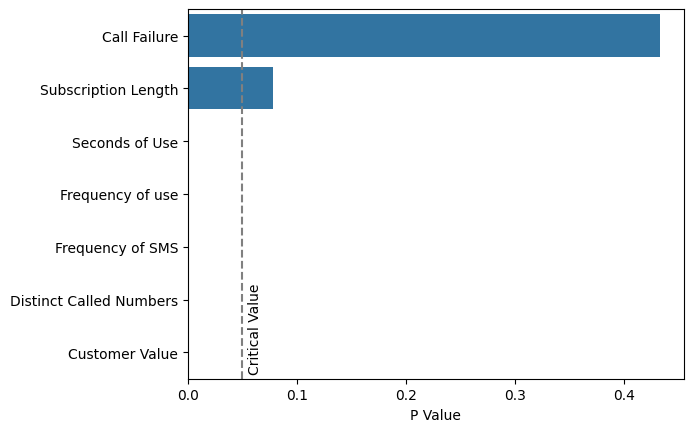

In [30]:
axes = sns.barplot(
    data=pd.Series(
        data=mannwhitneyu_pvalues,
        index=numerical_variables.columns
    ),
    orient="h"
)

axes.set_xlabel(xlabel="P Value")

plt.axvline(
    x=0.05,
    color="grey",
    linestyle="dashed"
)

plt.text(
    x=0.055,
    y=0.02,
    s="Critical Value",
    rotation=90,
    transform=axes.get_xaxis_transform()
)

plt.show()

Secara umum, asumsi yang digunakan dalam Mann-Whitney U Test adalah sebagai berikut:
1. All the observations from both groups are independent of each other,
2. The responses are at least ordinal (i.e., one can at least say, of any two observations, which is the greater),
3. Under the null hypothesis $H_0$, the distributions of both populations are identical.
4. The alternative hypothesis $H_1$ is that the distributions are not identical.

we can also interpret a significant Mann–Whitney U test as showing a difference in medians. 
* if both the dispersions and shapes of the distribution of both samples differ, the Mann–Whitney U test fails a test of medians.
* signifikansi yang dihasilkan uji statistik ini pun masih selaras dengan yang ditunjukkan pada analisis visual sebelumnya: hanya variabel `Call Failure` dan `Subscription Length` yang insignificantly differs from each other after subsetting them with `Churn` values of `False` and `True`

#### Categorical vs. Categorical

serupa dengan yang telah diterapkan pada analisis multivariat antara variabel numerikal dengan target variabel (kategorikal), analisis berikutnya juga akan pass the parameter `hue="Churn"` that adds a categorical dimension to the categorical variables

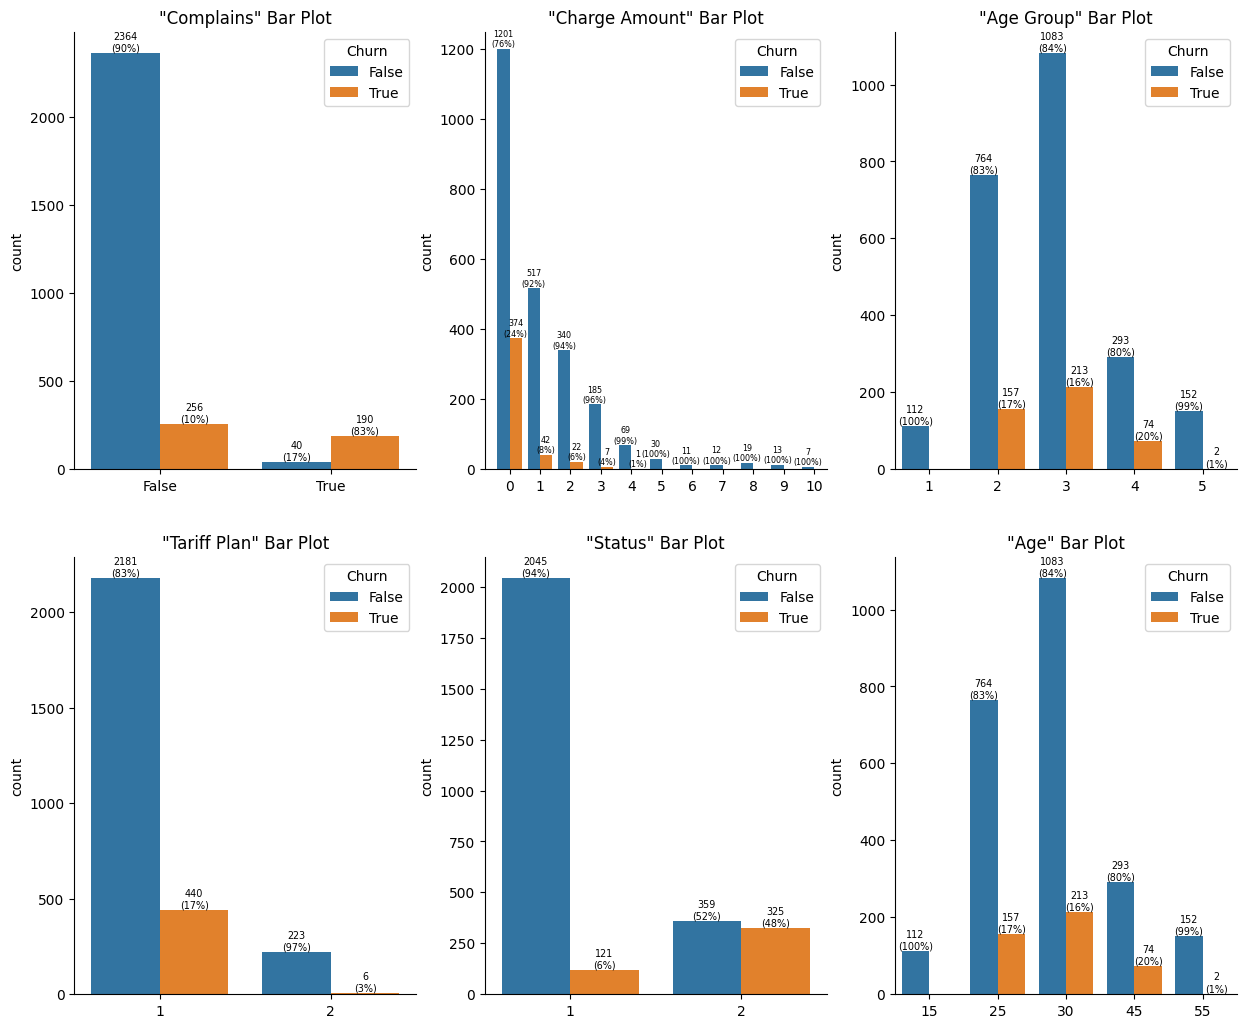

In [31]:
plt.figure(figsize=(15, 12.5))

def plot_multivariate_categorical(fontsize="medium"):
    plt.subplot(2, 3, count + 1)

    data = pd.concat(
        objs=[df.groupby(by=variable)["Churn"].value_counts().sort_index(),
            df.groupby(by=variable)["Churn"].value_counts(normalize=True).mul(other=100)],
        axis=1
    ).sort_values(by="Churn")

    axes = sns.barplot(
        data=data,
        x=variable,
        y="count",
        hue="Churn"
    )

    axes.set_title(label=f'''"{variable}" Bar Plot''')
    axes.set_xlabel(xlabel=None)
    axes.spines.top.set_visible(b=False)
    axes.spines.right.set_visible(b=False)


    for index, patch in enumerate(iterable=axes.patches[0:-1 - 1]):
        text = f"{round(patch.get_height())}\n({round(data.iloc[index, 1])}%)"
        axes.annotate(
            text=text,
            xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
            fontsize=fontsize,
            horizontalalignment="center",
            verticalalignment="bottom"
        )
    
    return axes

for count, variable in enumerate(iterable=categorical_variables):
    if variable=="Charge Amount":
        axes = plot_multivariate_categorical(fontsize="xx-small")
        axes.margins(0.04)
    elif variable=="Age Group" or "Age":
        plot_multivariate_categorical(fontsize="x-small")
    else:
        plot_multivariate_categorical()

berikut interpretasi yang dapat diambil pada tiap visualisasi di atas:
* tingkat churn meningkat secara signifikan saat pelanggan dibedakan dari segi `Complains` dan `Status`:
    * misal proporsi pelanggan yang `Churn` namun tidak melayangkan `Complains` apapun hanya sebesar `10%`, namun untuk pelanggan yang `Churn` dan juga `Complains`, proporsinya menjadi `83%`
    * dapat diambil kesimpulan sementara bahwa kedua variable/feature ini merupakan strong predictor untuk Telecom churned customers
    * observasi ini tidak didapatkan dari variabel `Tariff Plan`, karena pelanggan yang `Churn` proporsional dengan distribusi pelanggan pada tiap label (`1: Pay as you go`, `2: contractual`)
* untuk variabel ordinal `Charge Amount`, `Age Group`, dan `Age`, tingkat churn juga proporsional dengan distribusi pelanggan pada tiap ordinal label dalam variabel ini. sehingga pada rentang/nilai distribusi tertentu (misal pada `Charge Amount = 0` dan `Age Group = 2-4`), tingkat pelanggan yang `Churn` akan lebih tinggi daripada rentang/nilai lainnya

dan seperti halnya pada bagian sebelumnya, statistik inferensial/uji hipotesis juga dapat diterapkan untuk mengukur asosiasi dari pasangan categorical variabel dengan (categorical) target dalam dataset ini.
* untuk pasangan variabel kategorikal, nilai yang diuji adalah proporsi —khususnya signifikansi proporsi dari tiap label dalam variabel kategorikal terhadap target kategorikal `Churn`
* karena jumlah label pada feature kategorikal dalam dataset ini beragam (mulai dari variabel yang bersifat binary hingga multilabel), maka uji statistik yang berdasar pada dichotomous variable seperti [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio) dan [difference in proportion](https://en.wikipedia.org/wiki/Two-proportion_Z-test) kurang sesuai untuk digunakan
* uji statistik yang digunakan adalah [Pearson's chi-squared test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test) terhadap variabel categorical yang subset dengan binary `Churn` value, untuk mengevaluasi apakah perbedaan dua set ini arose by chance

In [32]:
from scipy.stats import chi2_contingency

chi2_contingency_pvalues = list()
chi2_contingency_significancy = list()

for variable in categorical_variables:
    
    contingency_table = pd.crosstab(index=df[variable], columns=df["Churn"])
    _, chi2_contingency_pvalue, _, _ = chi2_contingency(observed=contingency_table)
    chi2_contingency_pvalues.append(chi2_contingency_pvalue)

    critical_value = 0.05
    if chi2_contingency_pvalue < critical_value:
        chi2_contingency_significancy.append("Significant")
    else:
        chi2_contingency_significancy.append("Insignificant")

In [33]:
pd.DataFrame(
    data=[chi2_contingency_pvalues, chi2_contingency_significancy],
    index=["P-Value", "Significancy"],
    columns=categorical_variables.columns
).style.format(
    formatter="{:.1g}".format,
    subset=pd.IndexSlice[["P-Value"], :]
)

,Complains,Charge Amount,Age Group,Tariff Plan,Status,Age
P-Value,1e-185,2e-33,1e-10,3e-08,7e-152,1e-10
Significancy,Significant,Significant,Significant,Significant,Significant,Significant


*(Hasil uji statistik ini hanya ditampilkan secara tabular, karena p-value seluruh variabel kategorikal bernilai kecil dan statistically significant)*

Untuk asumsi yang digunakan dalam [Chi-squared test for statistical independence](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence) adalah sebagai berikut:
1. An "observation" consists of the values of two categorical outcomes
2. Each observation is allocated to one cell of a two-dimensional array of cells (called a contingency table) according to the values of the two outcomes
3. Under the null hypothesis $H_0$, the row variable is independent of the column variable
4. The alternative hypothesis $H_1$ corresponds to the variables having an association or relationship where the structure of this relationship is not specified

Using a significance level of 5%, we would reject the null hypothesis in favor of the alternative hypothesis: `proporsi Churn di tiap variabel kategorikal tidak sama dengan proporsi Non-Churn`.
* Because `chi2_contingency` performs a two-sided test, the alternative hypothesis does not indicate the direction of the effect.
* dan selaras dengan yang telah disampaikan sebelumnya, `P-Value` dari `Complains` dan `Status` bernilai jauh lebih kecil dari feature kategorikal lainnya, sebagai indikasi dari strong predictor terhadap target variabel `Churn`

dapat dilihat juga sejauh ini `Age Group` dan `Age` memiliki kesamaan distribusi univariat, multivariat, hingga asosiasi dengan target variabel. analisis berikutnya menunjukkan sejauh mana tingkat kesamaan ini...

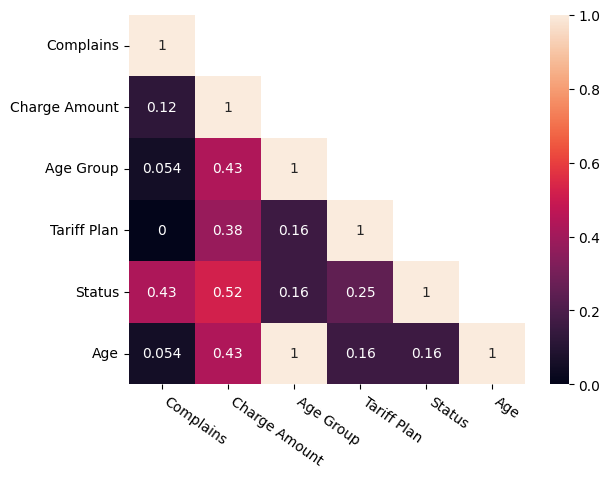

In [34]:
import phik

categorical_correlation_matrix = phik.phik_matrix(df=categorical_variables)

mask = np.triu(np.ones_like(a=categorical_correlation_matrix))
np.fill_diagonal(a=mask, val=False)

axes = sns.heatmap(
    data=categorical_correlation_matrix, 
    annot=True,
    mask=mask
)

plt.setp(
    obj=axes.xaxis.get_majorticklabels(), 
    rotation=-35, 
    ha='left'
)

plt.show()

From the colored correlation matrix above, we can see that indeed `Age Group` have been calculated directly from the number of customer's `Age` and/or vice versa.
* The correlation coefficient between them equals `1` which indicates a perfect correlation. 
* These are called dependent variables and one of them can therefore be left out since it does not contribute any additional information.
* Untuk menjaga konsistensi dengan data source —especially the data dictionary—, variabel `Age` yang dipilih untuk dihapus dari dataset
    * ditambah dengan tidak adanya dictionary yang memadai untuk variabel ini.
    * langkah ini sebenarnya adalah bagian dari data cleaning, sehingga seperti pada bagian sebelumnya, akan dipropagate ke...

In [35]:
df = df.drop(columns="Age")

dari pengurangan jumlah kolom/variabel dalam data memungkinkan adanya permasalahan data yang terduplikasi dari subset baru dalam dataset, sehingga proses deteksi data yang terduplikasi perlu dilakukan lagi

In [36]:
df[df.duplicated()]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn


Tidak ada data yang terduplikasi, sehingga analisis dapat dilanjutkan ke bagian berikutnya yakni whole dataset analisis atau bahasa teknisnya factor analysis...

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Outlier | Outlier issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Normality | Normality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Rare Label | Rare label issues detected | Analyzed further in `Section 4: Model Experimentation` |
| Imbalanced Data | Imbalanced data detected | Analyzed further in `Section 4: Model Experimentation` |
| **Correlation** | **Correlation issue detected** | **Solved; propagated to `Section 4: Custom Preprocessor`** |

### Factor Analysis

While data in two or three dimensions can be plotted to show the inherent structure of the data, equivalent high-dimensional plots (e.g. more than three) can be very difficult to visualize and are much less intuitive. To aid visualization of the structure of a dataset, the dimension must be reduced in some way. [Factor analysis](https://en.wikipedia.org/wiki/Factor_analysis) is a statistical method used to describe variability among observed, correlated variables in terms of a potentially lower number of unobserved variables called factors. 
* For example, it is possible that variations in thirteen observed variables (as in the case of this project) mainly reflect the variations in two unobserved (underlying) variables. Factor analysis searches for such joint variations in response to unobserved latent variables.
* The observed variables are modelled as linear combinations of the potential factors plus "error" terms, hence factor analysis can be thought of as a special case of errors-in-variables models.
* The simplest way to accomplish this dimensionality reduction modelling is by taking a random projection of the data. Though this allows some degree of visualization of the data structure, the randomness of the choice leaves much to be desired. In a random projection, it is likely that the more interesting structure within the data will be lost.
* To address this concern, a number of supervised and unsupervised linear dimensionality reduction frameworks have been designed, such as Principal Component Analysis (PCA), Independent Component Analysis, Linear Discriminant Analysis, and others. These algorithms define specific rubrics to choose an “interesting” linear projection of the data. These methods can be powerful, but often miss important non-linear structure in the data.

[Manifold Learning](https://scikit-learn.org/1.5/modules/manifold.html) can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. The typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.
* One of the implementation of manifold learning is [t-SNE](https://scikit-learn.org/1.5/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne) or t-distributed Stochastic Neighbor Embedding. It converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:
    * Revealing the structure at many scales on a single map
    * Revealing data that lie in multiple, different, manifolds or clusters
    * Reducing the tendency to crowd points together at the center
* While Isomap, LLE and other manifold learning variants are best suited to unfold a single continuous low dimensional manifold, t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples as highlighted on the S-curve example. This ability to group samples based on the local structure might be beneficial to visually disentangle a dataset that comprises several manifolds at once.

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.manifold import TSNE

X = df.drop(columns="Churn")
y = df["Churn"]

encoder = OneHotEncoder(
    drop="first",
    sparse_output=False
)
X["Complains"] = pd.DataFrame(
    data=encoder.fit_transform(X=X[["Complains"]]), 
    columns=encoder.get_feature_names_out()
).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

arbitrary_random_state = 0
tsne = TSNE(
    n_components=2,
    random_state=arbitrary_random_state
)
tsne_representation = tsne.fit_transform(X=X_scaled)

Note:
* *Tahapan ini akan sedikit menyinggung tentang machine learning algorithm, sehingga penjelasan yang lebih lengkap akan disertakan pada bagian `Modelling`*
* Dimensionality reduction derives new, low-dimensional features from the data itself, without any supervised (target) input. sehingga dalam tahap ini, dataset akan dipisahkan antara feature dengan target variabel.
* Machine learning models can only train on floating-point values; models can't train on strings or booleans such as `True` or `False`. And different encoding methods exists for converting categorical or other data to numerical vectors that a model can train on. Dalam tahapan ini, metode encoding sederhana yang disebut `OneHotEncoder` digunakan untuk convert the boolean values `True`/`False` of the remaining binary feature `Complains` into numerical values.
* Because manifold learning methods are based on a nearest-neighbor search, the algorithm may perform poorly otherwise. `StandardScaler` digunakan for convenient ways of scaling heterogeneous data, so that the same scale is used over all features. 
* The algorithm is stochastic and multiple restarts with different random seeds can yield different embeddings. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line.

In [38]:
pd.DataFrame(data=tsne_representation)

,0,1
0,-0.967224,-10.879790
1,-48.514065,25.729317
2,1.495745,55.866718
3,-7.381927,29.253399
4,-10.389063,31.628111
...,...,...
2845,19.903479,-44.345375
2846,-21.145023,-5.162724
2847,-23.875183,-31.582970
2848,32.868519,4.500511


`tsne` visualize high-dimensional data by giving each data point a location in two or three-dimensional map
* secara default dan dalam project ini, visualisasi yang digunakan dalam 2 dimensi dan ditunjukkan oleh parameter `n_components=2`
* Its basic idea is simple: find a projection for a high-dimensional feature space onto the plane such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other:
    1. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability.
    2. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map.

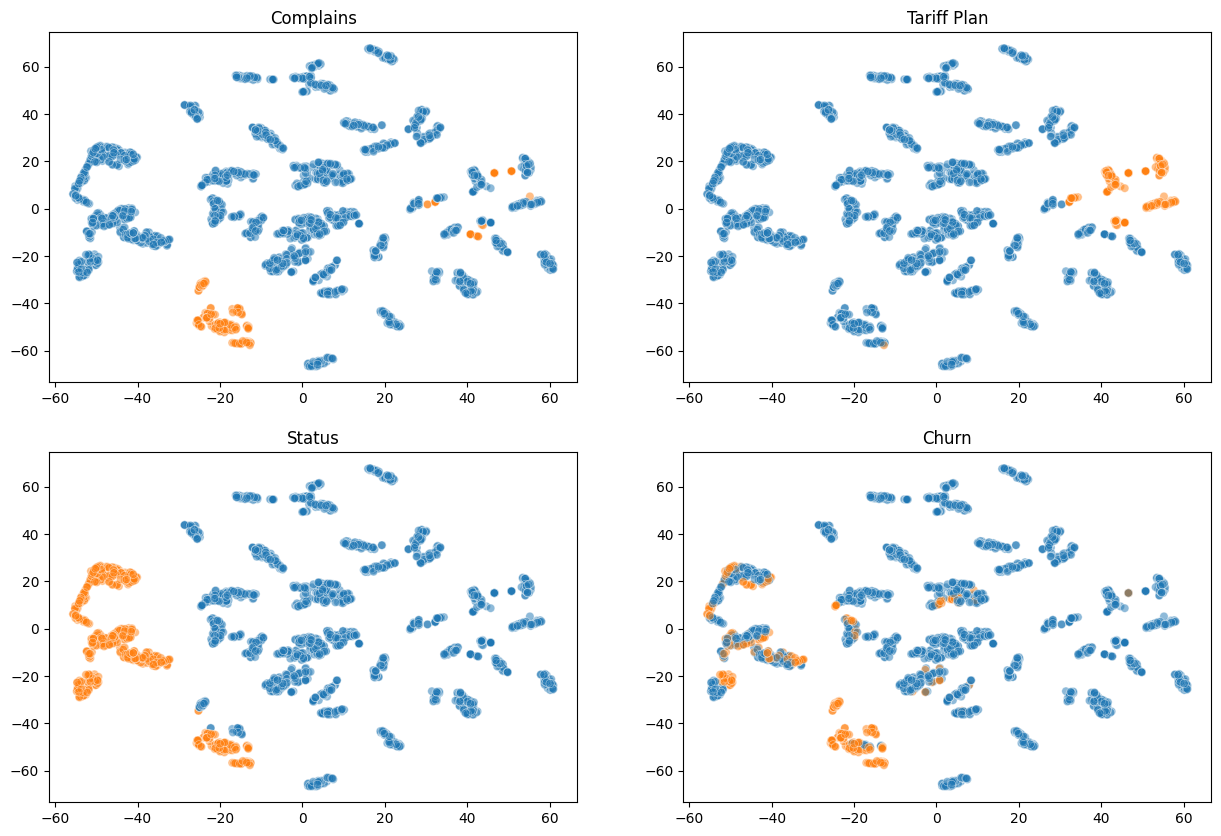

In [59]:
plt.figure(figsize=(15, 10))

def plot_factor_categorical(arg):
    axes = sns.scatterplot(
    x=tsne_representation[:, 0],
    y=tsne_representation[:, 1],
    hue=df[feature].map(arg=arg),
    legend=False,
    alpha=0.5,
    )
    axes.set_title(feature)

for count, feature in enumerate(iterable=df[["Complains", "Tariff Plan", "Status", "Churn"]]):
    plt.subplot(2, 2, count + 1)
    if feature == "Complains" or feature == "Churn":
        plot_factor_categorical(arg={False: "blue", True: "orange"})
    else:
        plot_factor_categorical(arg={1: "blue", 2: "orange"})

* tiap komponen dalam `tsne_representation` mewakili koordinat pada 2D plane, sehingga scatterplot dapat digunakan untuk memvisualisasikan komponen tersebut
* untuk memahami pengelompokan dari scatterplot ini, parameter `hue` dapat digunakan untuk mewarnai tiap titik data dengan warna yang berbeda.
    * supaya visualisasi lebih mudah dipahami, variabel yang digunakan sebagai `hue` adalah variabel kategorikal dengan jumlah label yang relatif lebih sedikit
    * dalam project ini, target variabel `Churn` serta feature `Complains`, `Tariff Plan`, dan `Status` hanya terdiri dari 2 nilai/kategori, sehingga variabel inilah yang digunakan dalam visualisasi di atas

scatterplot untuk feature variabel menunjukkan bahwa customer yang melayangkan `Complains`, memiliki `Tariff Plan` kontraktual, dan `Status` inactive terkumpul pada cluster tertentu. 
* untuk `Complains` dan `Status`, cluster tersebut selaras dengan cluster dissatisfied customers yang ditunjukkan pada scatterplot target variabel `Churn`
* cluster `Tariff Plan` tidak sepenuhnya capture the pattern in `Churn`
* masih ada beberapa data point pada visualisasi `Churn` —tepatnya di middle area of the feature space— yang tidak dapat dicapture oleh pola cluster dari ketiga feature variabel ini. hal ini mengindikasikan adanya kombinasi feature lainnya yang...

**add legend for features**

## Analysis Summary

...

Data Anomaly:

| Anomaly | Insight | Action |
| --- | --- | --- |
| Inconsistent Label | Inconsistent label detected | Solved; propagated to `Section 4: Custom Preprocessor` |
| Data Type | Data type issue detected | Solved; propagated to `Section 4: Custom Preprocessor` |
| Duplicated Data | Duplicated data detected | Solved; propagated to `Section 4: Custom Preprocessor` |
| Correlation | Correlation issue detected | Solved; propagated to `Section 4: Custom Preprocessor` |
| Cardinality | Cardinality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Variable Magnitude | Variable magnitude issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Outlier | Outlier issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Normality | Normality issue detected | Analyzed further in `Section 4: Model Experimentation` |
| Rare Label | Rare label issues detected | Analyzed further in `Section 4: Model Experimentation` |
| Imbalanced Data | Imbalanced data detected | Analyzed further in `Section 4: Model Experimentation` |

Statistical Test:

...

<div>
    <a href="../notebook/1. Business & Data Understanding.ipynb" style="float: left; padding: 10px; background-color: #007bff; color: white;">Previous</a>
    <a href="../notebook/3. Data Modeling.ipynb" style="float: right; padding: 10px; background-color: #007bff; color: white"> Next </a>
</div>